# 1.Project Title: [Data Classificcation]
___

#### a. Introduction

- **Objective:** Clearly state the goal of your project. What problem are you trying to solve?
- **Background:** Provide context on why this problem is important or interesting. Mention any relevant research, datasets, or industry relevance.
- **Scope:** Define the boundaries of your project. What will be included, and what will be out of scope?

#### b. Project Overview

- **Project Summary:** A brief overview of the project, including the main steps you will take to achieve the objective.
- **Milestones:** Outline the key milestones or phases of the project. For example:
  - Data Collection
  - Data Preprocessing
  - Model Selection
  - Model Training and Evaluation
  - Results and Conclusion

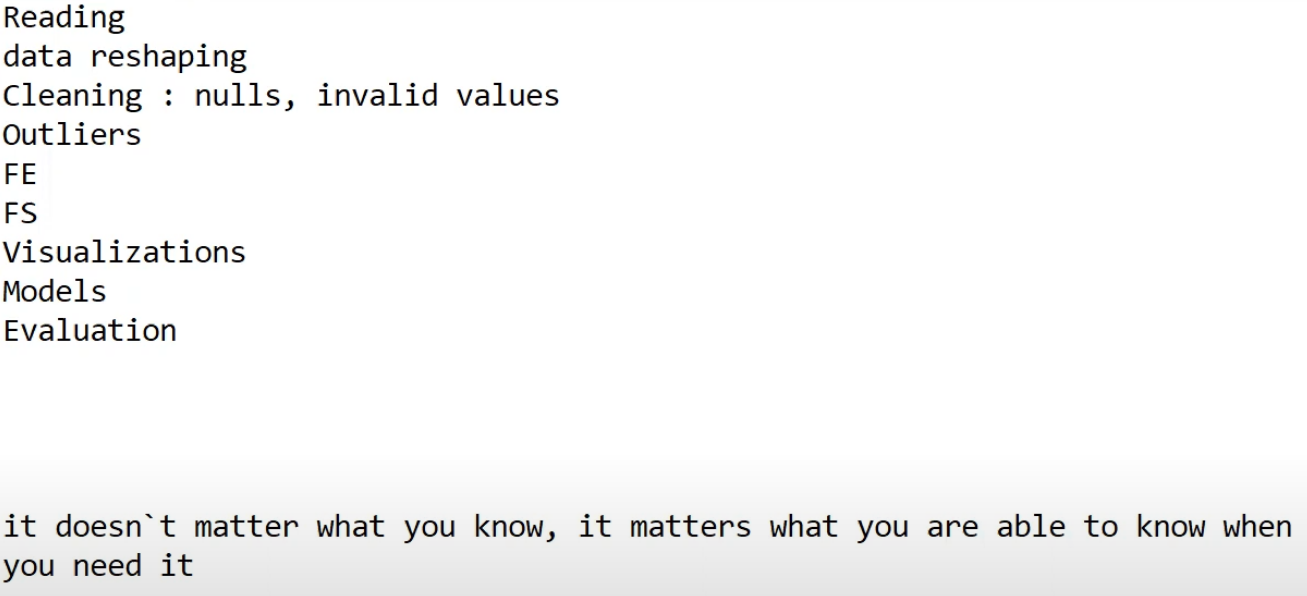

#### c. About the Author

- **Name:** [Ahmed Ferganey]
- **Background:** Junior Data Scientist and Machine Learning Engineer with a strong foundation in embedded systems, industrial engineering, and supply chain management. Knowledgeable in statistical analysis, NLP, Computer Vision, and deep learning, with hands-on experience in Python, SQL, and Docker.
- **Motivation:** Why are you interested in this project? What do you hope to learn or achieve?
- **Contact:** [LinkedIn acc](https://www.linkedin.com/in/ahmed-ferganey/)



#### d. Tools and Technologies

- **Programming Languages:** List the programming languages you will use (e.g., Python).
- **Libraries and Frameworks:** List the specific libraries and frameworks you will use (e.g., TensorFlow, scikit-learn).
- **Software and Tools:** Mention any software or tools necessary for the project (e.g., Jupyter Notebook, Git).

#### e. Dataset Description

- **Dataset Name:** [Name of the Dataset]
- **Source:** Where did you obtain the dataset? Include a link if possible.
- **Description:** Briefly describe the dataset, including the number of features, the target variable, and any other important details.
- **Data Preprocessing:** Outline any preprocessing steps you anticipate, such as data cleaning, normalization, or feature engineering.

#### f. Methodology

- **Model Selection:** Describe the types of models you are considering and why.
- **Evaluation Metrics:** Define how you will evaluate your models' performance (e.g., accuracy, F1-score).
- **Validation Strategy:** Explain how you will validate your models, such as cross-validation or a 


### 2. importing libraries
___



In [2]:

import io
import sys
import pandas as pd
pd.set_option('display.max_columns', None)
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set(style="whitegrid")
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectPercentile , f_classif ,SelectKBest
from sklearn.feature_selection import chi2 , f_classif 
import plotly.express as px
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression,SGDClassifier
from sklearn.naive_bayes import GaussianNB,BernoulliNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis,QuadraticDiscriminantAnalysis
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.decomposition import PCA



[GUI Python](https://wiki.python.org/moin/GuiProgramming)

    - Desktop app
    - Mobile  app
    - Website app

### 3. reading the raw data
___

In [3]:
rawdata_= pd.read_csv('/media/ahmed-ferganey/AI4/01-Learning_AI/MyGitHub/Machine_Learning_Projects/CSV_Files/pd_speech_features.csv')
rawdata_.head()


id  gender      PPE      DFA     RPDE  numPulses  numPeriodsPulses  \
0   0       1  0.85247  0.71826  0.57227      240.0             239.0   
1   0       1  0.76686  0.69481  0.53966      234.0             233.0   
2   0       1  0.85083  0.67604  0.58982      232.0             231.0   
3   1       0  0.41121  0.79672  0.59257      178.0             177.0   
4   1       0  0.32790  0.79782  0.53028      236.0             235.0   

   meanPeriodPulses  stdDevPeriodPulses  locPctJitter  locAbsJitter  \
0          0.008064            0.000087       0.00218      0.000018   
1          0.008258            0.000073       0.00195      0.000016   
2          0.008340            0.000060       0.00176      0.000015   
3          0.010858            0.000183       0.00419      0.000046   
4          0.008162            0.002669       0.00535      0.000044   

   rapJitter  ppq5Jitter  ddpJitter  locShimmer locDbShimmer  apq3Shimmer  \
0    0.00067     0.00129    0.00200     0.05883        0.517      0.03011   
1    0.00052     0.00112    0.00157     0.05516        0.502      0.02320   
2    0.00057     0.00111    0.00171     0.09902        0.897      0.05094   
3    0.00149     0.00268    0.00446     0.05451        0.527      0.02395   
4    0.00166     0.00227    0.00499     0.05610        0.497      0.02909   

   apq5Shimmer  apq11Shimmer  ddaShimmer  meanAutoCorrHarmonicity  \
0      0.03496       0.04828     0.09034                 0.970805   
1      0.03675       0.06195     0.06961                 0.984322   
2      0.06497       0.07772     0.15282                 0.974846   
3      0.02857       0.04462     0.07185                 0.968343   
4      0.03327       0.05278     0.08728                 0.975754   

   meanNoiseToHarmHarmonicity  meanHarmToNoiseHarmonicity  minIntensity  \
0                    0.036223                      18.995     69.997496   
1                    0.017974                      21.497     67.415903   
2                    0.026313                      17.651     62.661706   
3                    0.042003                      19.865     76.306989   
4                    0.027139                      19.557     76.645686   

  maxIntensity  meanIntensity          f1           f2           f3  \
0  76.08804597      72.465512  539.342735  1031.849040  2447.162183   
1  73.04637365      71.528945  564.363615  1016.367294  2383.565201   
2   71.6335491      68.086583  548.444604  1032.406341  2357.826954   
3  81.00074938      79.190593  819.529588  1201.813897  3154.035654   
4  80.93725752      79.183495  846.796144  1215.346469  3201.513132   

            f4          b1          b2          b3          b4  GQ_prc5_95  \
0  3655.054806  101.092218   83.147440  255.214830  396.643631     0.77778   
1  3498.681572   58.465428   86.487292  248.357127  218.229722     0.81250   
2  3678.128717  160.387771   54.685168  151.694847   84.240339     0.81818   
3  4122.163933  238.667052  191.984916  573.752909  526.147599     0.98548   
4  4085.456839  402.216738  210.061394  203.637106  384.611697     0.97847   

   GQ_std_cycle_open  GQ_std_cycle_closed  GNE_mean  GNE_std  GNE_SNR_TKEO  \
0            11.7245               2.8277   1.17300  0.26512      0.083127   
1            13.8284               2.8908   1.02210  0.22004      0.127410   
2            26.9273               2.6975   0.84951  0.15756      0.116890   
3           139.5744               1.6961   0.83405  0.17295      0.147370   
4           102.0549              15.4045   0.83556  0.16210      0.151990   

   GNE_SNR_SEO  GNE_NSR_TKEO  GNE_NSR_SEO  VFER_mean  VFER_std  VFER_entropy  \
0  1200445.612        1.5347       3.0152   0.000463  0.000260       0.83621   
1  1298455.445        1.6029       3.0600   0.000615  0.000295       1.04550   
2  1272869.841        1.6223       3.0309   0.000360  0.000266       0.63668   
3  1932289.206        1.6717       3.0293   0.000196  0.000194       0.45452   
4  1861807.802        1.6781       3.0362  

In [4]:
rawdata_.shape

(756, 755)

In [5]:
rawdata_.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 756 entries, 0 to 755
Columns: 755 entries, id to class
dtypes: float64(749), int64(4), object(2)
memory usage: 4.4+ MB


In [6]:
rawdata_[['id','gender','PPE','DFA','numPulses']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 756 entries, 0 to 755
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   id         756 non-null    int64  
 1   gender     756 non-null    int64  
 2   PPE        756 non-null    float64
 3   DFA        756 non-null    float64
 4   numPulses  755 non-null    float64
dtypes: float64(3), int64(2)
memory usage: 29.7 KB


In [7]:


## Writing the dataframe info to a file
#with open('./data_features.txt', 'w') as f:
#    total_columns = len(rawdata_.columns)
#    batch_size = 20
#    
#    for i in range(0, total_columns, batch_size):
#        end_index = min(i + batch_size, total_columns)
#        f.write(f"Data columns from {i} to {end_index}:\n")
#        
#        # Create a DataFrame slice for the current batch
#        df_slice = rawdata_.iloc[:, i:end_index]
#        
#        # Capture the DataFrame info as a string
#        buffer = io.StringIO()
#        df_slice.info(buf=buffer, verbose=True, show_counts=True)
#        info_output_str = buffer.getvalue()
#        
#        # Write the info output to the file
#        f.write(info_output_str)
#        
#        f.write('\n')
#        f.write('-' * 80 + '\n')  # Adds a separator for readability


In [8]:
with open('./data_features.txt', 'w') as f:
    total_columns = len(rawdata_.columns)
    batch_size = 20

    for i in range(0, total_columns, batch_size):
        rawdata_[rawdata_.columns[i:i+batch_size]].info(buf=f)



### 4. data analysis
___

### 5. data cleaning
___

##### 5.1 finding nulls

In [9]:
type(rawdata_.isna().sum())

pandas.core.series.Series

In [10]:
datanulls_= dict(rawdata_.isna().sum())
datanulls_

{'id': 0,
 'gender': 0,
 'PPE': 0,
 'DFA': 0,
 'RPDE': 1,
 'numPulses': 1,
 'numPeriodsPulses': 1,
 'meanPeriodPulses': 1,
 'stdDevPeriodPulses': 1,
 'locPctJitter': 1,
 'locAbsJitter': 2,
 'rapJitter': 1,
 'ppq5Jitter': 2,
 'ddpJitter': 1,
 'locShimmer': 1,
 'locDbShimmer': 1,
 'apq3Shimmer': 1,
 'apq5Shimmer': 1,
 'apq11Shimmer': 1,
 'ddaShimmer': 1,
 'meanAutoCorrHarmonicity': 1,
 'meanNoiseToHarmHarmonicity': 2,
 'meanHarmToNoiseHarmonicity': 1,
 'minIntensity': 1,
 'maxIntensity': 1,
 'meanIntensity': 1,
 'f1': 1,
 'f2': 1,
 'f3': 1,
 'f4': 1,
 'b1': 1,
 'b2': 1,
 'b3': 1,
 'b4': 1,
 'GQ_prc5_95': 1,
 'GQ_std_cycle_open': 1,
 'GQ_std_cycle_closed': 1,
 'GNE_mean': 1,
 'GNE_std': 1,
 'GNE_SNR_TKEO': 1,
 'GNE_SNR_SEO': 1,
 'GNE_NSR_TKEO': 1,
 'GNE_NSR_SEO': 1,
 'VFER_mean': 2,
 'VFER_std': 2,
 'VFER_entropy': 2,
 'VFER_SNR_TKEO': 2,
 'VFER_SNR_SEO': 2,
 'VFER_NSR_TKEO': 2,
 'VFER_NSR_SEO': 2,
 'IMF_SNR_SEO': 2,
 'IMF_SNR_TKEO': 2,
 'IMF_SNR_entropy': 2,
 'IMF_NSR_SEO': 2,
 'IMF_NSR_

In [11]:
existednulls_ = {a: b for a, b in zip(datanulls_.keys(), datanulls_.values()) if b!=0}
existednulls_

{'RPDE': 1,
 'numPulses': 1,
 'numPeriodsPulses': 1,
 'meanPeriodPulses': 1,
 'stdDevPeriodPulses': 1,
 'locPctJitter': 1,
 'locAbsJitter': 2,
 'rapJitter': 1,
 'ppq5Jitter': 2,
 'ddpJitter': 1,
 'locShimmer': 1,
 'locDbShimmer': 1,
 'apq3Shimmer': 1,
 'apq5Shimmer': 1,
 'apq11Shimmer': 1,
 'ddaShimmer': 1,
 'meanAutoCorrHarmonicity': 1,
 'meanNoiseToHarmHarmonicity': 2,
 'meanHarmToNoiseHarmonicity': 1,
 'minIntensity': 1,
 'maxIntensity': 1,
 'meanIntensity': 1,
 'f1': 1,
 'f2': 1,
 'f3': 1,
 'f4': 1,
 'b1': 1,
 'b2': 1,
 'b3': 1,
 'b4': 1,
 'GQ_prc5_95': 1,
 'GQ_std_cycle_open': 1,
 'GQ_std_cycle_closed': 1,
 'GNE_mean': 1,
 'GNE_std': 1,
 'GNE_SNR_TKEO': 1,
 'GNE_SNR_SEO': 1,
 'GNE_NSR_TKEO': 1,
 'GNE_NSR_SEO': 1,
 'VFER_mean': 2,
 'VFER_std': 2,
 'VFER_entropy': 2,
 'VFER_SNR_TKEO': 2,
 'VFER_SNR_SEO': 2,
 'VFER_NSR_TKEO': 2,
 'VFER_NSR_SEO': 2,
 'IMF_SNR_SEO': 2,
 'IMF_SNR_TKEO': 2,
 'IMF_SNR_entropy': 2,
 'IMF_NSR_SEO': 2,
 'IMF_NSR_TKEO': 2,
 'IMF_NSR_entropy': 2,
 'mean_Log_en

In [12]:
sorted_list = sorted(existednulls_.items(), key = lambda x:x[1], reverse = True)
sorted_list = {i[0]:i[1] for  i in sorted_list}
sorted_list

{'det_LT_TKEO_std_6_coef': 534,
 'locAbsJitter': 2,
 'ppq5Jitter': 2,
 'meanNoiseToHarmHarmonicity': 2,
 'VFER_mean': 2,
 'VFER_std': 2,
 'VFER_entropy': 2,
 'VFER_SNR_TKEO': 2,
 'VFER_SNR_SEO': 2,
 'VFER_NSR_TKEO': 2,
 'VFER_NSR_SEO': 2,
 'IMF_SNR_SEO': 2,
 'IMF_SNR_TKEO': 2,
 'IMF_SNR_entropy': 2,
 'IMF_NSR_SEO': 2,
 'IMF_NSR_TKEO': 2,
 'IMF_NSR_entropy': 2,
 'mean_Log_energy': 2,
 'mean_MFCC_0th_coef': 2,
 'mean_MFCC_1st_coef': 2,
 'mean_MFCC_2nd_coef': 2,
 'mean_MFCC_3rd_coef': 2,
 'mean_MFCC_4th_coef': 2,
 'mean_MFCC_5th_coef': 2,
 'mean_MFCC_6th_coef': 2,
 'mean_MFCC_7th_coef': 2,
 'mean_MFCC_8th_coef': 2,
 'mean_MFCC_9th_coef': 2,
 'mean_MFCC_10th_coef': 2,
 'mean_MFCC_11th_coef': 2,
 'mean_MFCC_12th_coef': 2,
 'mean_delta_log_energy': 2,
 'mean_0th_delta': 2,
 'mean_1st_delta': 2,
 'mean_2nd_delta': 2,
 'mean_3rd_delta': 2,
 'mean_4th_delta': 2,
 'mean_5th_delta': 2,
 'mean_6th_delta': 2,
 'mean_7th_delta': 2,
 'mean_8th_delta': 2,
 'mean_9th_delta': 2,
 'mean_10th_delta': 2,
 

In [13]:
rawdata_.drop(['det_LT_TKEO_std_6_coef'],axis=1,inplace=True)

In [14]:
NullsInRows_ = dict(rawdata_.isnull().sum(axis=1))


NullsInRows_ = sorted(NullsInRows_.items(), key = lambda x:x[1], reverse = True)
NullsInRows_ = {i[0]:i[1] for  i in NullsInRows_}
NullsInRows_

{152: 193,
 220: 155,
 22: 1,
 45: 1,
 82: 1,
 0: 0,
 1: 0,
 2: 0,
 3: 0,
 4: 0,
 5: 0,
 6: 0,
 7: 0,
 8: 0,
 9: 0,
 10: 0,
 11: 0,
 12: 0,
 13: 0,
 14: 0,
 15: 0,
 16: 0,
 17: 0,
 18: 0,
 19: 0,
 20: 0,
 21: 0,
 23: 0,
 24: 0,
 25: 0,
 26: 0,
 27: 0,
 28: 0,
 29: 0,
 30: 0,
 31: 0,
 32: 0,
 33: 0,
 34: 0,
 35: 0,
 36: 0,
 37: 0,
 38: 0,
 39: 0,
 40: 0,
 41: 0,
 42: 0,
 43: 0,
 44: 0,
 46: 0,
 47: 0,
 48: 0,
 49: 0,
 50: 0,
 51: 0,
 52: 0,
 53: 0,
 54: 0,
 55: 0,
 56: 0,
 57: 0,
 58: 0,
 59: 0,
 60: 0,
 61: 0,
 62: 0,
 63: 0,
 64: 0,
 65: 0,
 66: 0,
 67: 0,
 68: 0,
 69: 0,
 70: 0,
 71: 0,
 72: 0,
 73: 0,
 74: 0,
 75: 0,
 76: 0,
 77: 0,
 78: 0,
 79: 0,
 80: 0,
 81: 0,
 83: 0,
 84: 0,
 85: 0,
 86: 0,
 87: 0,
 88: 0,
 89: 0,
 90: 0,
 91: 0,
 92: 0,
 93: 0,
 94: 0,
 95: 0,
 96: 0,
 97: 0,
 98: 0,
 99: 0,
 100: 0,
 101: 0,
 102: 0,
 103: 0,
 104: 0,
 105: 0,
 106: 0,
 107: 0,
 108: 0,
 109: 0,
 110: 0,
 111: 0,
 112: 0,
 113: 0,
 114: 0,
 115: 0,
 116: 0,
 117: 0,
 118: 0,
 119: 0,
 120: 0,

In [15]:
# Display rows 152 and 220
MaxNullsInRows_to_display = [152, 220]
selected_rows = rawdata_.iloc[MaxNullsInRows_to_display]

print(selected_rows)

     id  gender      PPE      DFA     RPDE  numPulses  numPeriodsPulses  \
152  50       0  0.84892  0.65789      NaN        NaN               NaN   
220  73       1  0.82473  0.63973  0.42058      265.0             264.0   

     meanPeriodPulses  stdDevPeriodPulses  locPctJitter  locAbsJitter  \
152               NaN                 NaN           NaN           NaN   
220          0.007285            0.001807       0.00754      0.000055   

     rapJitter  ppq5Jitter  ddpJitter  locShimmer locDbShimmer  apq3Shimmer  \
152        NaN         NaN        NaN         NaN          NaN          NaN   
220    0.00236     0.00167    0.00709     0.04538        0.414      0.02596   

     apq5Shimmer  apq11Shimmer  ddaShimmer  meanAutoCorrHarmonicity  \
152          NaN           NaN         NaN                      NaN   
220      0.02328       0.03089     0.07789                 0.986698   

     meanNoiseToHarmHarmonicity  meanHarmToNoiseHarmonicity  minIntensity  \
152                      

In [16]:
# removing rows contain nulls 

rawdata_.drop([152,220],axis=0,inplace=True)

In [17]:
# checking on nulls

datanulls_= dict(rawdata_.isna().sum())
datanulls_


existednulls_ = {a: b for a, b in zip(datanulls_.keys(), datanulls_.values()) if b!=0}
existednulls_

{'locAbsJitter': 1, 'ppq5Jitter': 1, 'meanNoiseToHarmHarmonicity': 1}

In [18]:
rawdata_.dropna(inplace=True)

In [19]:
rawdata_

id  gender      PPE      DFA     RPDE  numPulses  numPeriodsPulses  \
0      0       1  0.85247  0.71826  0.57227      240.0             239.0   
1      0       1  0.76686  0.69481  0.53966      234.0             233.0   
2      0       1  0.85083  0.67604  0.58982      232.0             231.0   
3      1       0  0.41121  0.79672  0.59257      178.0             177.0   
4      1       0  0.32790  0.79782  0.53028      236.0             235.0   
..   ...     ...      ...      ...      ...        ...               ...   
751  250       0  0.80903  0.56355  0.28385      417.0             416.0   
752  250       0  0.16084  0.56499  0.59194      415.0             413.0   
753  251       0  0.88389  0.72335  0.46815      381.0             380.0   
754  251       0  0.83782  0.74890  0.49823      340.0             339.0   
755  251       0  0.81304  0.76471  0.46374      340.0             339.0   

     meanPeriodPulses  stdDevPeriodPulses  locPctJitter  locAbsJitter  \
0            0.008064            0.000087       0.00218      0.000018   
1            0.008258            0.000073       0.00195      0.000016   
2            0.008340            0.000060       0.00176      0.000015   
3            0.010858            0.000183       0.00419      0.000046   
4            0.008162            0.002669       0.00535      0.000044   
..                ...                 ...           ...           ...   
751          0.004627            0.000052       0.00064      0.000003   
752          0.004550            0.000220       0.00143      0.000006   
753          0.005069            0.000103       0.00076      0.000004   
754          0.005679            0.000055       0.00092      0.000005   
755          0.005676            0.000037       0.00078      0.000004   

     rapJitter  ppq5Jitter  ddpJitter  locShimmer locDbShimmer  apq3Shimmer  \
0      0.00067     0.00129    0.00200     0.05883        0.517      0.03011   
1      0.00052     0.00112    0.00157     0.05516        0.502      0.02320   
2      0.00057     0.00111    0.00171     0.09902        0.897      0.05094   
3      0.00149     0.00268    0.00446     0.05451        0.527      0.02395   
4      0.00166     0.00227    0.00499     0.05610        0.497      0.02909   
..         ...         ...        ...         ...          ...          ...   
751    0.00008     0.00022    0.00024     0.01947        0.171      0.01068   
752    0.00016     0.00041    0.00047     0.04291        0.482      0.02307   
753    0.00011     0.00030    0.00034     0.02978        0.263      0.01597   
754    0.00017     0.00041    0.00052     0.03552        0.311      0.01791   
755    0.00014     0.00033    0.00042     0.03702        0.326      0.01940   

     apq5Shimmer  apq11Shimmer  ddaShimmer  meanAutoCorrHarmonicity  \
0        0.03496       0.04828     0.09034                 0.970805   
1        0.03675       0.06195     0.06961                 0.984322   
2        0.06497       0.07772     0.15282                 0.974846   
3        0.02857       0.04462     0.07185                 0.968343   
4        0.03327       0.05278     0.08728                 0.975754   
..           ...           ...         ...                      ...   
751      0.01260       0.01547     0.03204                 0.997438   
752      0.02626       0.03272     0.06920                 0.976867   
753      0.01916       0.02271     0.04790                 0.995544   
754      0.02348       0.02648     0.05373                 0.988241   
755      0.02332       0.02765     0.05820                 0.996402   

     meanNoiseToHarmHarmonicity  meanHarmToNoiseHarmonicity  minIntensity  \
0                      0.036223                      18.995     69.997496   
1                      0.017974                      21.497     67.415903   
2                      0.026313                      17.651     62.661706   
3                      0.042003                      19.865     76.306989   
4                      0.0271

In [20]:
rawdata_.reset_index(inplace=True)
rawdata_.drop(['index','id'],axis=1,inplace=True)

In [21]:
rawdata_

gender      PPE      DFA     RPDE  numPulses  numPeriodsPulses  \
0         1  0.85247  0.71826  0.57227      240.0             239.0   
1         1  0.76686  0.69481  0.53966      234.0             233.0   
2         1  0.85083  0.67604  0.58982      232.0             231.0   
3         0  0.41121  0.79672  0.59257      178.0             177.0   
4         0  0.32790  0.79782  0.53028      236.0             235.0   
..      ...      ...      ...      ...        ...               ...   
746       0  0.80903  0.56355  0.28385      417.0             416.0   
747       0  0.16084  0.56499  0.59194      415.0             413.0   
748       0  0.88389  0.72335  0.46815      381.0             380.0   
749       0  0.83782  0.74890  0.49823      340.0             339.0   
750       0  0.81304  0.76471  0.46374      340.0             339.0   

     meanPeriodPulses  stdDevPeriodPulses  locPctJitter  locAbsJitter  \
0            0.008064            0.000087       0.00218      0.000018   
1            0.008258            0.000073       0.00195      0.000016   
2            0.008340            0.000060       0.00176      0.000015   
3            0.010858            0.000183       0.00419      0.000046   
4            0.008162            0.002669       0.00535      0.000044   
..                ...                 ...           ...           ...   
746          0.004627            0.000052       0.00064      0.000003   
747          0.004550            0.000220       0.00143      0.000006   
748          0.005069            0.000103       0.00076      0.000004   
749          0.005679            0.000055       0.00092      0.000005   
750          0.005676            0.000037       0.00078      0.000004   

     rapJitter  ppq5Jitter  ddpJitter  locShimmer locDbShimmer  apq3Shimmer  \
0      0.00067     0.00129    0.00200     0.05883        0.517      0.03011   
1      0.00052     0.00112    0.00157     0.05516        0.502      0.02320   
2      0.00057     0.00111    0.00171     0.09902        0.897      0.05094   
3      0.00149     0.00268    0.00446     0.05451        0.527      0.02395   
4      0.00166     0.00227    0.00499     0.05610        0.497      0.02909   
..         ...         ...        ...         ...          ...          ...   
746    0.00008     0.00022    0.00024     0.01947        0.171      0.01068   
747    0.00016     0.00041    0.00047     0.04291        0.482      0.02307   
748    0.00011     0.00030    0.00034     0.02978        0.263      0.01597   
749    0.00017     0.00041    0.00052     0.03552        0.311      0.01791   
750    0.00014     0.00033    0.00042     0.03702        0.326      0.01940   

     apq5Shimmer  apq11Shimmer  ddaShimmer  meanAutoCorrHarmonicity  \
0        0.03496       0.04828     0.09034                 0.970805   
1        0.03675       0.06195     0.06961                 0.984322   
2        0.06497       0.07772     0.15282                 0.974846   
3        0.02857       0.04462     0.07185                 0.968343   
4        0.03327       0.05278     0.08728                 0.975754   
..           ...           ...         ...                      ...   
746      0.01260       0.01547     0.03204                 0.997438   
747      0.02626       0.03272     0.06920                 0.976867   
748      0.01916       0.02271     0.04790                 0.995544   
749      0.02348       0.02648     0.05373                 0.988241   
750      0.02332       0.02765     0.05820                 0.996402   

     meanNoiseToHarmHarmonicity  meanHarmToNoiseHarmonicity  minIntensity  \
0                      0.036223                      18.995     69.997496   
1                      0.017974                      21.497     67.415903   
2                      0.026313                      17.651     62.661706   
3                      0.042003                      19.865     76.306989   
4                      0.027139                      19.557     76.645686   
..         

In [22]:
# Create a dictionary of column names and their data types
columntypes_ = dict(rawdata_.dtypes)

# Identify columns where the data type is 'object'
wrongcolumn = {k:str(v) for k,v in zip(columntypes_.keys(), columntypes_.values()) if v == ('object')}

wrongcolumn

{'locDbShimmer': 'object', 'maxIntensity': 'object'}

In [23]:
# Display the original DataFrame and indicate the columns with 'object' type
print("Columns with type 'object':")
print(wrongcolumn)
rawdata_[[col for col in rawdata_.columns if col in wrongcolumn.keys()]]

Columns with type 'object':
{'locDbShimmer': 'object', 'maxIntensity': 'object'}


locDbShimmer maxIntensity
0          0.517  76.08804597
1          0.502  73.04637365
2          0.897   71.6335491
3          0.527  81.00074938
4          0.497  80.93725752
..           ...          ...
746        0.171  82.23944692
747        0.482  81.60629107
748        0.263  77.61249838
749        0.311  79.26605772
750        0.326  79.67017664

[751 rows x 2 columns]

In [24]:
# Function to attempt conversion to float and handle exceptions
def convert_to_float(val):
    try:
        return float(val)
    except ValueError:
        return print(val)  # Return the original value if conversion fails

# Identify columns with 'object' type
object_columns = [col for col in rawdata_.columns if rawdata_[col].dtype == 'object']

# Attempt conversion for each column
for col in object_columns:
    rawdata_[col] = rawdata_[col].apply(convert_to_float)


1.13#4
66.13744a406


In [25]:
rawdata_['locDbShimmer'] = rawdata_['locDbShimmer'].replace('1.13#4','1.134')

In [26]:
rawdata_['maxIntensity'] = rawdata_['maxIntensity'].replace('66.13744a406','66.13744406')

In [27]:
# Function to attempt conversion to float and handle exceptions
def convert_to_float(val):
    try:
        return float(val)
    except ValueError:
        return print(val)  # Return the original value if conversion fails

# Identify columns with 'object' type
object_columns = [col for col in rawdata_.columns if rawdata_[col].dtype == 'object']

# Attempt conversion for each column
for col in object_columns:
    rawdata_[col] = rawdata_[col].apply(convert_to_float)


In [28]:
# Convert the columns with type 'object' to 'float'
for column in wrongcolumn:
    # Convert the entire column to float
    rawdata_[column] = rawdata_[column].astype(float)

In [29]:
#Print Data Types After Conversion

rawdata_[list(wrongcolumn.keys())].info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 751 entries, 0 to 750
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   locDbShimmer  750 non-null    float64
 1   maxIntensity  750 non-null    float64
dtypes: float64(2)
memory usage: 11.9 KB


##### 5.2 outliers

In [30]:
# WINEPREFIX=~/.wine wine /home/ahmed-ferganey/.wine/drive_c/MLHelper/ML_Helper_1.21/MLHelper.exe


In [31]:
rawdata_.head()

gender      PPE      DFA     RPDE  numPulses  numPeriodsPulses  \
0       1  0.85247  0.71826  0.57227      240.0             239.0   
1       1  0.76686  0.69481  0.53966      234.0             233.0   
2       1  0.85083  0.67604  0.58982      232.0             231.0   
3       0  0.41121  0.79672  0.59257      178.0             177.0   
4       0  0.32790  0.79782  0.53028      236.0             235.0   

   meanPeriodPulses  stdDevPeriodPulses  locPctJitter  locAbsJitter  \
0          0.008064            0.000087       0.00218      0.000018   
1          0.008258            0.000073       0.00195      0.000016   
2          0.008340            0.000060       0.00176      0.000015   
3          0.010858            0.000183       0.00419      0.000046   
4          0.008162            0.002669       0.00535      0.000044   

   rapJitter  ppq5Jitter  ddpJitter  locShimmer  locDbShimmer  apq3Shimmer  \
0    0.00067     0.00129    0.00200     0.05883         0.517      0.03011   
1    0.00052     0.00112    0.00157     0.05516         0.502      0.02320   
2    0.00057     0.00111    0.00171     0.09902         0.897      0.05094   
3    0.00149     0.00268    0.00446     0.05451         0.527      0.02395   
4    0.00166     0.00227    0.00499     0.05610         0.497      0.02909   

   apq5Shimmer  apq11Shimmer  ddaShimmer  meanAutoCorrHarmonicity  \
0      0.03496       0.04828     0.09034                 0.970805   
1      0.03675       0.06195     0.06961                 0.984322   
2      0.06497       0.07772     0.15282                 0.974846   
3      0.02857       0.04462     0.07185                 0.968343   
4      0.03327       0.05278     0.08728                 0.975754   

   meanNoiseToHarmHarmonicity  meanHarmToNoiseHarmonicity  minIntensity  \
0                    0.036223                      18.995     69.997496   
1                    0.017974                      21.497     67.415903   
2                    0.026313                      17.651     62.661706   
3                    0.042003                      19.865     76.306989   
4                    0.027139                      19.557     76.645686   

   maxIntensity  meanIntensity          f1           f2           f3  \
0     76.088046      72.465512  539.342735  1031.849040  2447.162183   
1     73.046374      71.528945  564.363615  1016.367294  2383.565201   
2     71.633549      68.086583  548.444604  1032.406341  2357.826954   
3     81.000749      79.190593  819.529588  1201.813897  3154.035654   
4     80.937258      79.183495  846.796144  1215.346469  3201.513132   

            f4          b1          b2          b3          b4  GQ_prc5_95  \
0  3655.054806  101.092218   83.147440  255.214830  396.643631     0.77778   
1  3498.681572   58.465428   86.487292  248.357127  218.229722     0.81250   
2  3678.128717  160.387771   54.685168  151.694847   84.240339     0.81818   
3  4122.163933  238.667052  191.984916  573.752909  526.147599     0.98548   
4  4085.456839  402.216738  210.061394  203.637106  384.611697     0.97847   

   GQ_std_cycle_open  GQ_std_cycle_closed  GNE_mean  GNE_std  GNE_SNR_TKEO  \
0            11.7245               2.8277   1.17300  0.26512      0.083127   
1            13.8284               2.8908   1.02210  0.22004      0.127410   
2            26.9273               2.6975   0.84951  0.15756      0.116890   
3           139.5744               1.6961   0.83405  0.17295      0.147370   
4           102.0549              15.4045   0.83556  0.16210      0.151990   

   GNE_SNR_SEO  GNE_NSR_TKEO  GNE_NSR_SEO  VFER_mean  VFER_std  VFER_entropy  \
0  1200445.612        1.5347       3.0152   0.000463  0.000260       0.83621   
1  1298455.445        1.6029       3.0600   0.000615  0.000295       1.04550   
2  1272869.841        1.6223       3.0309   0.000360  0.000266       0.63668   
3  1932289.206        1.6717       3.0293   0.000196  0.000194       0.45452   
4  1861807.802        1.6781       3.0362   0.000281  0

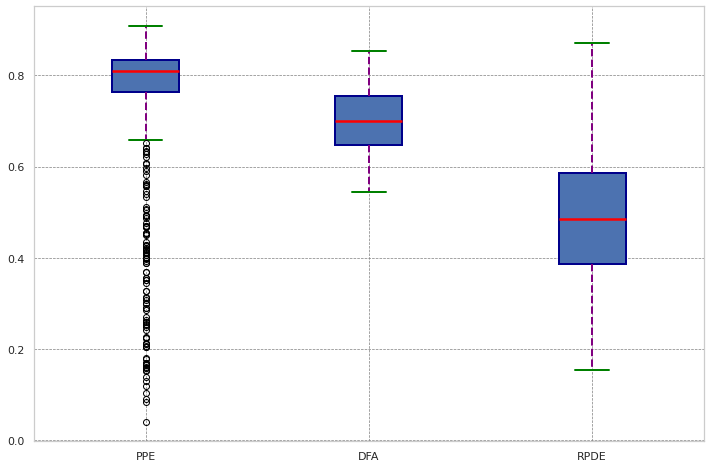

'"\n\nplt.figure(figsize=(12, 8))  # Adjust the width and height as needed\nrawdata_[[\'PPE\', \'DFA\', \'RPDE\']].plot(kind=\'box\', ax=plt.gca())\nplt.show()\n\n'

In [32]:

# Create a box plot with a larger size and customized colors
plt.figure(figsize=(12, 8))  # Adjust the size as needed

# Customizing the colors for each boxplot
boxprops = dict(linestyle='-', linewidth=2, color='darkblue')
medianprops = dict(linestyle='-', linewidth=2.5, color='red')
whiskerprops = dict(linestyle='--', linewidth=2, color='purple')
capprops = dict(linestyle='-', linewidth=2, color='green')
flierprops = dict(marker='o', color='orange', markersize=6)

rawdata_[['PPE', 'DFA', 'RPDE']].plot(kind='box', 
                                      boxprops=boxprops,
                                      medianprops=medianprops,
                                      whiskerprops=whiskerprops,
                                      capprops=capprops,
                                      flierprops=flierprops,
                                      patch_artist=True,  # Fill with color
                                      ax=plt.gca())

# Adding background color for boxes
for patch in plt.gca().artists:
    patch.set_facecolor('lightblue')
    patch.set_edgecolor('black')

# Adding grid lines for better visibility
plt.grid(True, linestyle='--', linewidth=0.7, color='gray')

# Display the plot
plt.show()


""""

plt.figure(figsize=(12, 8))  # Adjust the width and height as needed
rawdata_[['PPE', 'DFA', 'RPDE']].plot(kind='box', ax=plt.gca())
plt.show()

"""


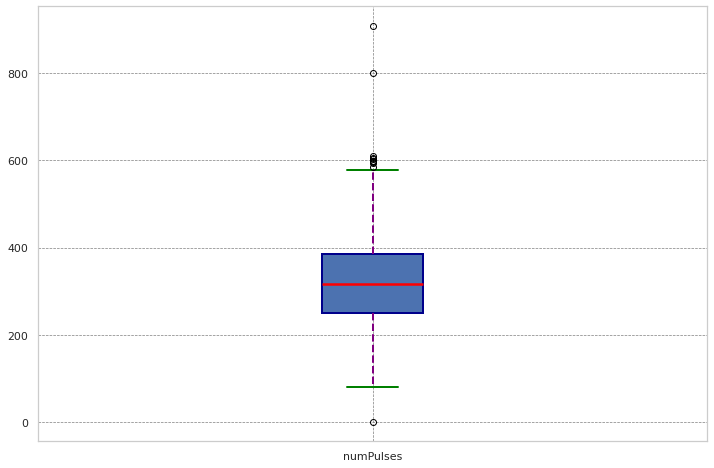

In [33]:

# Create a box plot with a larger size and customized colors
plt.figure(figsize=(12, 8))  # Adjust the size as needed

# Customizing the colors for each boxplot
boxprops = dict(linestyle='-', linewidth=2, color='darkblue')
medianprops = dict(linestyle='-', linewidth=2.5, color='red')
whiskerprops = dict(linestyle='--', linewidth=2, color='purple')
capprops = dict(linestyle='-', linewidth=2, color='green')
flierprops = dict(marker='o', color='orange', markersize=6)

rawdata_[['numPulses']].plot(kind='box', 
                                      boxprops=boxprops,
                                      medianprops=medianprops,
                                      whiskerprops=whiskerprops,
                                      capprops=capprops,
                                      flierprops=flierprops,
                                      patch_artist=True,  # Fill with color
                                      ax=plt.gca())

# Adding background color for boxes
for patch in plt.gca().artists:
    patch.set_facecolor('lightblue')
    patch.set_edgecolor('black')

# Adding grid lines for better visibility
plt.grid(True, linestyle='--', linewidth=0.7, color='gray')

# Display the plot
plt.show()



In [34]:


for x in ['PPE', 'DFA', 'RPDE', 'numPulses']:
    q75,q25 = np.percentile(rawdata_.loc[:,x],[75,25])
    intr_qr = q75-q25
    max = q75+(1*intr_qr)
    min = q25-(1*intr_qr)
    print(f' For {x} Min outliers has {rawdata_.loc[rawdata_[x] < min,x].shape[0]} rows and Max has {rawdata_.loc[rawdata_[x] > max,x].shape[0]}')


 For PPE Min outliers has 118 rows and Max has 1
 For DFA Min outliers has 0 rows and Max has 0
 For RPDE Min outliers has 2 rows and Max has 16
 For numPulses Min outliers has 8 rows and Max has 26


In [35]:
# 2 - Interquartile range(IQR)


for x in ['PPE', 'DFA', 'RPDE', 'numPulses']:
    q75,q25 = np.percentile(rawdata_.loc[:,x],[75,25])
    intr_qr = q75-q25
    max = q75+(1*intr_qr)
    min = q25-(1*intr_qr)
    print(f' For {x} Min outliers has {rawdata_.loc[rawdata_[x] < min,x].shape[0]} rows and Max has {rawdata_.loc[rawdata_[x] > max,x].shape[0]}')

    rawdata_.loc[rawdata_[x] < min,x] = np.nan
    rawdata_.loc[rawdata_[x] > max,x] = np.nan

rawdata_ = rawdata_.dropna(axis = 0)

rawdata_.reset_index(inplace=True)
rawdata_.drop(['index'],axis = 1,inplace=True)



 For PPE Min outliers has 118 rows and Max has 1
 For DFA Min outliers has 0 rows and Max has 0
 For RPDE Min outliers has 2 rows and Max has 16
 For numPulses Min outliers has 8 rows and Max has 26


/tmp/ipykernel_326384/1110298261.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rawdata_.drop(['index'],axis = 1,inplace=True)


In [36]:

for x in ['PPE', 'DFA', 'RPDE', 'numPulses']:
    q75,q25 = np.percentile(rawdata_.loc[:,x],[75,25])
    intr_qr = q75-q25
    max = q75+(1*intr_qr)
    min = q25-(1*intr_qr)
    print(f' For {x} Min outliers has {rawdata_.loc[rawdata_[x] < min,x].shape[0]} rows and Max has {rawdata_.loc[rawdata_[x] > max,x].shape[0]}')


 For PPE Min outliers has 44 rows and Max has 5
 For DFA Min outliers has 0 rows and Max has 0
 For RPDE Min outliers has 1 rows and Max has 4
 For numPulses Min outliers has 0 rows and Max has 4


##### 5.3 feature extraction

In [37]:
rawdata_

gender      PPE      DFA     RPDE  numPulses  numPeriodsPulses  \
0         1  0.85247  0.71826  0.57227      240.0             239.0   
1         1  0.76686  0.69481  0.53966      234.0             233.0   
2         1  0.85083  0.67604  0.58982      232.0             231.0   
3         1  0.76095  0.62145  0.54543      322.0             321.0   
4         1  0.83671  0.62079  0.51179      318.0             317.0   
..      ...      ...      ...      ...        ...               ...   
596       0  0.83172  0.57849  0.36017      375.0             374.0   
597       0  0.80903  0.56355  0.28385      417.0             416.0   
598       0  0.88389  0.72335  0.46815      381.0             380.0   
599       0  0.83782  0.74890  0.49823      340.0             339.0   
600       0  0.81304  0.76471  0.46374      340.0             339.0   

     meanPeriodPulses  stdDevPeriodPulses  locPctJitter  locAbsJitter  \
0            0.008064            0.000087       0.00218      0.000018   
1            0.008258            0.000073       0.00195      0.000016   
2            0.008340            0.000060       0.00176      0.000015   
3            0.005991            0.000107       0.00222      0.000013   
4            0.006074            0.000136       0.00282      0.000017   
..                ...                 ...           ...           ...   
596          0.005147            0.000036       0.00088      0.000005   
597          0.004627            0.000052       0.00064      0.000003   
598          0.005069            0.000103       0.00076      0.000004   
599          0.005679            0.000055       0.00092      0.000005   
600          0.005676            0.000037       0.00078      0.000004   

     rapJitter  ppq5Jitter  ddpJitter  locShimmer  locDbShimmer  apq3Shimmer  \
0      0.00067     0.00129    0.00200     0.05883         0.517      0.03011   
1      0.00052     0.00112    0.00157     0.05516         0.502      0.02320   
2      0.00057     0.00111    0.00171     0.09902         0.897      0.05094   
3      0.00036     0.00094    0.00108     0.03203         0.280      0.01550   
4      0.00034     0.00088    0.00103     0.06300         0.539      0.02949   
..         ...         ...        ...         ...           ...          ...   
596    0.00012     0.00033    0.00037     0.01834         0.160      0.00977   
597    0.00008     0.00022    0.00024     0.01947         0.171      0.01068   
598    0.00011     0.00030    0.00034     0.02978         0.263      0.01597   
599    0.00017     0.00041    0.00052     0.03552         0.311      0.01791   
600    0.00014     0.00033    0.00042     0.03702         0.326      0.01940   

     apq5Shimmer  apq11Shimmer  ddaShimmer  meanAutoCorrHarmonicity  \
0        0.03496       0.04828     0.09034                 0.970805   
1        0.03675       0.06195     0.06961                 0.984322   
2        0.06497       0.07772     0.15282                 0.974846   
3        0.01971       0.03274     0.04650                 0.984564   
4        0.04091       0.06445     0.08848                 0.987625   
..           ...           ...         ...                      ...   
596      0.01141       0.01463     0.02932                 0.994932   
597      0.01260       0.01547     0.03204                 0.997438   
598      0.01916       0.02271     0.04790                 0.995544   
599      0.02348       0.02648     0.05373                 0.988241   
600      0.02332       0.02765     0.05820                 0.996402   

     meanNoiseToHarmHarmonicity  meanHarmToNoiseHarmonicity  minIntensity  \
0                      0.036223                      18.995     69.997496   
1                      0.017974                      21.497     67.415903   
2                      0.026313                      17.651     62.661706   
3                      0.015745                      18.670     75.059718   
4                      0.012621                      20.302     75.097654   

In [38]:
# meanPeriodPulses	stdDevPeriodPulses	locPctJitter  locAbsJitter


def F_CalculatingSignalType(Mean, Std, Pct, Abs) :
    result =  ((float(Mean)*5) + (float(Std)*17) - (float(Pct))*3) / (float(Abs)+0.6)
    if result < 0.05:
        return 'weak'
    elif result < 0.1:
        return 'medium'
    else :
        return 'strong'

rawdata_['signalType'] = rawdata_.apply(lambda x: F_CalculatingSignalType(x['meanPeriodPulses'],
                                                                          x['stdDevPeriodPulses'],
                                                                          x['locPctJitter'],
                                                                          x['locAbsJitter']), axis=1)

/tmp/ipykernel_326384/1796873328.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rawdata_['signalType'] = rawdata_.apply(lambda x: F_CalculatingSignalType(x['meanPeriodPulses'],


In [39]:
rawdata_['signalType'].value_counts()

signalType
weak      364
medium    218
strong     19
Name: count, dtype: int64

In [40]:
rawdata_['signalType']= rawdata_['signalType'].replace({'weak':0, 'medium':1, 'strong':2})
rawdata_['signalType'].value_counts()

/tmp/ipykernel_326384/2590433683.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  rawdata_['signalType']= rawdata_['signalType'].replace({'weak':0, 'medium':1, 'strong':2})
/tmp/ipykernel_326384/2590433683.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rawdata_['signalType']= rawdata_['signalType'].replace({'weak':0, 'medium':1, 'strong':2})


signalType
0    364
1    218
2     19
Name: count, dtype: int64

##### 5.4 feature selection

In [41]:
rawdata_

gender      PPE      DFA     RPDE  numPulses  numPeriodsPulses  \
0         1  0.85247  0.71826  0.57227      240.0             239.0   
1         1  0.76686  0.69481  0.53966      234.0             233.0   
2         1  0.85083  0.67604  0.58982      232.0             231.0   
3         1  0.76095  0.62145  0.54543      322.0             321.0   
4         1  0.83671  0.62079  0.51179      318.0             317.0   
..      ...      ...      ...      ...        ...               ...   
596       0  0.83172  0.57849  0.36017      375.0             374.0   
597       0  0.80903  0.56355  0.28385      417.0             416.0   
598       0  0.88389  0.72335  0.46815      381.0             380.0   
599       0  0.83782  0.74890  0.49823      340.0             339.0   
600       0  0.81304  0.76471  0.46374      340.0             339.0   

     meanPeriodPulses  stdDevPeriodPulses  locPctJitter  locAbsJitter  \
0            0.008064            0.000087       0.00218      0.000018   
1            0.008258            0.000073       0.00195      0.000016   
2            0.008340            0.000060       0.00176      0.000015   
3            0.005991            0.000107       0.00222      0.000013   
4            0.006074            0.000136       0.00282      0.000017   
..                ...                 ...           ...           ...   
596          0.005147            0.000036       0.00088      0.000005   
597          0.004627            0.000052       0.00064      0.000003   
598          0.005069            0.000103       0.00076      0.000004   
599          0.005679            0.000055       0.00092      0.000005   
600          0.005676            0.000037       0.00078      0.000004   

     rapJitter  ppq5Jitter  ddpJitter  locShimmer  locDbShimmer  apq3Shimmer  \
0      0.00067     0.00129    0.00200     0.05883         0.517      0.03011   
1      0.00052     0.00112    0.00157     0.05516         0.502      0.02320   
2      0.00057     0.00111    0.00171     0.09902         0.897      0.05094   
3      0.00036     0.00094    0.00108     0.03203         0.280      0.01550   
4      0.00034     0.00088    0.00103     0.06300         0.539      0.02949   
..         ...         ...        ...         ...           ...          ...   
596    0.00012     0.00033    0.00037     0.01834         0.160      0.00977   
597    0.00008     0.00022    0.00024     0.01947         0.171      0.01068   
598    0.00011     0.00030    0.00034     0.02978         0.263      0.01597   
599    0.00017     0.00041    0.00052     0.03552         0.311      0.01791   
600    0.00014     0.00033    0.00042     0.03702         0.326      0.01940   

     apq5Shimmer  apq11Shimmer  ddaShimmer  meanAutoCorrHarmonicity  \
0        0.03496       0.04828     0.09034                 0.970805   
1        0.03675       0.06195     0.06961                 0.984322   
2        0.06497       0.07772     0.15282                 0.974846   
3        0.01971       0.03274     0.04650                 0.984564   
4        0.04091       0.06445     0.08848                 0.987625   
..           ...           ...         ...                      ...   
596      0.01141       0.01463     0.02932                 0.994932   
597      0.01260       0.01547     0.03204                 0.997438   
598      0.01916       0.02271     0.04790                 0.995544   
599      0.02348       0.02648     0.05373                 0.988241   
600      0.02332       0.02765     0.05820                 0.996402   

     meanNoiseToHarmHarmonicity  meanHarmToNoiseHarmonicity  minIntensity  \
0                      0.036223                      18.995     69.997496   
1                      0.017974                      21.497     67.415903   
2                      0.026313                      17.651     62.661706   
3                      0.015745                      18.670     75.059718   
4                      0.012621                      20.302     75.097654   

In [42]:
Percentagereduction = 100/(rawdata_.shape[1]-1)
Percentagereduction

0.13280212483399734

In [43]:
rawdata_['class'].value_counts()

class
1    448
0    153
Name: count, dtype: int64

In [44]:
X = rawdata_.drop(['class'], axis=1)
y = rawdata_['class']

In [45]:
FeatureSelection = SelectPercentile(score_func = f_classif, percentile=(((0.2+Percentagereduction) * 100))) # score_func can = f_classif
X_selected = FeatureSelection.fit_transform(X, y)


PreparedDataFrame_ = pd.DataFrame(X_selected, columns= [i for i,j in zip(X.columns,  FeatureSelection.get_support()) if j ]) 


""""

X_selected: 
This is assumed to be the transformed dataset containing only the selected features. It is the output after applying some feature selection method.

X.columns: 
These are the original column names of the dataset X.

FeatureSelection.get_support(): 
This method returns a boolean array where True indicates that the feature was selected, and False indicates that it was not.

zip(X.columns, FeatureSelection.get_support()): 
This pairs each column name with its corresponding True/False value from get_support().

[i for i, j in zip(X.columns, FeatureSelection.get_support()) if j]: 
This list comprehension extracts the column names that correspond to True in the get_support() array, i.e., the selected features.


"""



PreparedDataFrame_

gender      DFA     RPDE  numPulses  numPeriodsPulses  locPctJitter  \
0       1.0  0.71826  0.57227      240.0             239.0       0.00218   
1       1.0  0.69481  0.53966      234.0             233.0       0.00195   
2       1.0  0.67604  0.58982      232.0             231.0       0.00176   
3       1.0  0.62145  0.54543      322.0             321.0       0.00222   
4       1.0  0.62079  0.51179      318.0             317.0       0.00282   
..      ...      ...      ...        ...               ...           ...   
596     0.0  0.57849  0.36017      375.0             374.0       0.00088   
597     0.0  0.56355  0.28385      417.0             416.0       0.00064   
598     0.0  0.72335  0.46815      381.0             380.0       0.00076   
599     0.0  0.74890  0.49823      340.0             339.0       0.00092   
600     0.0  0.76471  0.46374      340.0             339.0       0.00078   

     locAbsJitter  rapJitter  ppq5Jitter  apq11Shimmer  \
0        0.000018    0.00067     0.00129       0.04828   
1        0.000016    0.00052     0.00112       0.06195   
2        0.000015    0.00057     0.00111       0.07772   
3        0.000013    0.00036     0.00094       0.03274   
4        0.000017    0.00034     0.00088       0.06445   
..            ...        ...         ...           ...   
596      0.000005    0.00012     0.00033       0.01463   
597      0.000003    0.00008     0.00022       0.01547   
598      0.000004    0.00011     0.00030       0.02271   
599      0.000005    0.00017     0.00041       0.02648   
600      0.000004    0.00014     0.00033       0.02765   

     meanHarmToNoiseHarmonicity  minIntensity  maxIntensity  meanIntensity  \
0                        18.995     69.997496     76.088046      72.465512   
1                        21.497     67.415903     73.046374      71.528945   
2                        17.651     62.661706     71.633549      68.086583   
3                        18.670     75.059718     78.381263      77.077102   
4                        20.302     75.097654     78.465346      76.841929   
..                          ...           ...           ...            ...   
596                      23.697     75.547500     77.575113      76.582605   
597                      26.813     79.991789     82.239447      81.244436   
598                      24.005     75.091300     77.612498      76.485859   
599                      19.706     76.168804     79.266058      77.870915   
600                      25.276     76.076331     79.670177      77.995949   

             f1           f2  VFER_mean  VFER_entropy  VFER_NSR_SEO  \
0    539.342735  1031.849040   0.000463       0.83621        1.3305   
1    564.363615  1016.367294   0.000615       1.04550        1.3177   
2    548.444604  1032.406341   0.000360       0.63668        1.3078   
3    710.861860  1165.801015   0.001706       3.47510        1.3039   
4    668.306515  1165.769341   0.001773       3.54940        1.3607   
..          ...          ...        ...           ...           ...   
596  931.741012  1466.757628   0.002772       6.10490        1.3734   
597  881.915768  1395.398812   0.019310      30.50930        1.4734   
598  687.046383  1382.653498   0.000113       0.38927        1.1821   
599  771.948334  1657.021811   0.000138       0.40543        1.1383   
600  706.566999  1612.140356   0.000059       0.19117        1.1496   

     IMF_SNR_entropy  mean_MFCC_0th_coef  mean_MFCC_2nd_coef  \
0            23.2610             11.4283             2.48740   
1            21.8851             12.1387             2.89860   
2            41.7310             11.3956             3.22080   
3            11.1578             16.8423             0.74769   
4             2.7385             16.1057            -0.66462   
..               ...                 ...                 ...   
596           5.6818             16.0844            -1.78610   
597           1.9044             19.2331            -1.97830   
598           9.2936         

In [46]:
PreparedDataFrame_['class'] = y
PreparedDataFrame_

gender      DFA     RPDE  numPulses  numPeriodsPulses  locPctJitter  \
0       1.0  0.71826  0.57227      240.0             239.0       0.00218   
1       1.0  0.69481  0.53966      234.0             233.0       0.00195   
2       1.0  0.67604  0.58982      232.0             231.0       0.00176   
3       1.0  0.62145  0.54543      322.0             321.0       0.00222   
4       1.0  0.62079  0.51179      318.0             317.0       0.00282   
..      ...      ...      ...        ...               ...           ...   
596     0.0  0.57849  0.36017      375.0             374.0       0.00088   
597     0.0  0.56355  0.28385      417.0             416.0       0.00064   
598     0.0  0.72335  0.46815      381.0             380.0       0.00076   
599     0.0  0.74890  0.49823      340.0             339.0       0.00092   
600     0.0  0.76471  0.46374      340.0             339.0       0.00078   

     locAbsJitter  rapJitter  ppq5Jitter  apq11Shimmer  \
0        0.000018    0.00067     0.00129       0.04828   
1        0.000016    0.00052     0.00112       0.06195   
2        0.000015    0.00057     0.00111       0.07772   
3        0.000013    0.00036     0.00094       0.03274   
4        0.000017    0.00034     0.00088       0.06445   
..            ...        ...         ...           ...   
596      0.000005    0.00012     0.00033       0.01463   
597      0.000003    0.00008     0.00022       0.01547   
598      0.000004    0.00011     0.00030       0.02271   
599      0.000005    0.00017     0.00041       0.02648   
600      0.000004    0.00014     0.00033       0.02765   

     meanHarmToNoiseHarmonicity  minIntensity  maxIntensity  meanIntensity  \
0                        18.995     69.997496     76.088046      72.465512   
1                        21.497     67.415903     73.046374      71.528945   
2                        17.651     62.661706     71.633549      68.086583   
3                        18.670     75.059718     78.381263      77.077102   
4                        20.302     75.097654     78.465346      76.841929   
..                          ...           ...           ...            ...   
596                      23.697     75.547500     77.575113      76.582605   
597                      26.813     79.991789     82.239447      81.244436   
598                      24.005     75.091300     77.612498      76.485859   
599                      19.706     76.168804     79.266058      77.870915   
600                      25.276     76.076331     79.670177      77.995949   

             f1           f2  VFER_mean  VFER_entropy  VFER_NSR_SEO  \
0    539.342735  1031.849040   0.000463       0.83621        1.3305   
1    564.363615  1016.367294   0.000615       1.04550        1.3177   
2    548.444604  1032.406341   0.000360       0.63668        1.3078   
3    710.861860  1165.801015   0.001706       3.47510        1.3039   
4    668.306515  1165.769341   0.001773       3.54940        1.3607   
..          ...          ...        ...           ...           ...   
596  931.741012  1466.757628   0.002772       6.10490        1.3734   
597  881.915768  1395.398812   0.019310      30.50930        1.4734   
598  687.046383  1382.653498   0.000113       0.38927        1.1821   
599  771.948334  1657.021811   0.000138       0.40543        1.1383   
600  706.566999  1612.140356   0.000059       0.19117        1.1496   

     IMF_SNR_entropy  mean_MFCC_0th_coef  mean_MFCC_2nd_coef  \
0            23.2610             11.4283             2.48740   
1            21.8851             12.1387             2.89860   
2            41.7310             11.3956             3.22080   
3            11.1578             16.8423             0.74769   
4             2.7385             16.1057            -0.66462   
..               ...                 ...                 ...   
596           5.6818             16.0844            -1.78610   
597           1.9044             19.2331            -1.97830   
598           9.2936         

In [47]:
PreparedDataFrame_.to_csv('PreparedData.csv')

### 6. visualization
___

In [48]:
PreparedDataFrame_

gender      DFA     RPDE  numPulses  numPeriodsPulses  locPctJitter  \
0       1.0  0.71826  0.57227      240.0             239.0       0.00218   
1       1.0  0.69481  0.53966      234.0             233.0       0.00195   
2       1.0  0.67604  0.58982      232.0             231.0       0.00176   
3       1.0  0.62145  0.54543      322.0             321.0       0.00222   
4       1.0  0.62079  0.51179      318.0             317.0       0.00282   
..      ...      ...      ...        ...               ...           ...   
596     0.0  0.57849  0.36017      375.0             374.0       0.00088   
597     0.0  0.56355  0.28385      417.0             416.0       0.00064   
598     0.0  0.72335  0.46815      381.0             380.0       0.00076   
599     0.0  0.74890  0.49823      340.0             339.0       0.00092   
600     0.0  0.76471  0.46374      340.0             339.0       0.00078   

     locAbsJitter  rapJitter  ppq5Jitter  apq11Shimmer  \
0        0.000018    0.00067     0.00129       0.04828   
1        0.000016    0.00052     0.00112       0.06195   
2        0.000015    0.00057     0.00111       0.07772   
3        0.000013    0.00036     0.00094       0.03274   
4        0.000017    0.00034     0.00088       0.06445   
..            ...        ...         ...           ...   
596      0.000005    0.00012     0.00033       0.01463   
597      0.000003    0.00008     0.00022       0.01547   
598      0.000004    0.00011     0.00030       0.02271   
599      0.000005    0.00017     0.00041       0.02648   
600      0.000004    0.00014     0.00033       0.02765   

     meanHarmToNoiseHarmonicity  minIntensity  maxIntensity  meanIntensity  \
0                        18.995     69.997496     76.088046      72.465512   
1                        21.497     67.415903     73.046374      71.528945   
2                        17.651     62.661706     71.633549      68.086583   
3                        18.670     75.059718     78.381263      77.077102   
4                        20.302     75.097654     78.465346      76.841929   
..                          ...           ...           ...            ...   
596                      23.697     75.547500     77.575113      76.582605   
597                      26.813     79.991789     82.239447      81.244436   
598                      24.005     75.091300     77.612498      76.485859   
599                      19.706     76.168804     79.266058      77.870915   
600                      25.276     76.076331     79.670177      77.995949   

             f1           f2  VFER_mean  VFER_entropy  VFER_NSR_SEO  \
0    539.342735  1031.849040   0.000463       0.83621        1.3305   
1    564.363615  1016.367294   0.000615       1.04550        1.3177   
2    548.444604  1032.406341   0.000360       0.63668        1.3078   
3    710.861860  1165.801015   0.001706       3.47510        1.3039   
4    668.306515  1165.769341   0.001773       3.54940        1.3607   
..          ...          ...        ...           ...           ...   
596  931.741012  1466.757628   0.002772       6.10490        1.3734   
597  881.915768  1395.398812   0.019310      30.50930        1.4734   
598  687.046383  1382.653498   0.000113       0.38927        1.1821   
599  771.948334  1657.021811   0.000138       0.40543        1.1383   
600  706.566999  1612.140356   0.000059       0.19117        1.1496   

     IMF_SNR_entropy  mean_MFCC_0th_coef  mean_MFCC_2nd_coef  \
0            23.2610             11.4283             2.48740   
1            21.8851             12.1387             2.89860   
2            41.7310             11.3956             3.22080   
3            11.1578             16.8423             0.74769   
4             2.7385             16.1057            -0.66462   
..               ...                 ...                 ...   
596           5.6818             16.0844            -1.78610   
597           1.9044             19.2331            -1.97830   
598           9.2936         

In [49]:
rawdata_

gender      PPE      DFA     RPDE  numPulses  numPeriodsPulses  \
0         1  0.85247  0.71826  0.57227      240.0             239.0   
1         1  0.76686  0.69481  0.53966      234.0             233.0   
2         1  0.85083  0.67604  0.58982      232.0             231.0   
3         1  0.76095  0.62145  0.54543      322.0             321.0   
4         1  0.83671  0.62079  0.51179      318.0             317.0   
..      ...      ...      ...      ...        ...               ...   
596       0  0.83172  0.57849  0.36017      375.0             374.0   
597       0  0.80903  0.56355  0.28385      417.0             416.0   
598       0  0.88389  0.72335  0.46815      381.0             380.0   
599       0  0.83782  0.74890  0.49823      340.0             339.0   
600       0  0.81304  0.76471  0.46374      340.0             339.0   

     meanPeriodPulses  stdDevPeriodPulses  locPctJitter  locAbsJitter  \
0            0.008064            0.000087       0.00218      0.000018   
1            0.008258            0.000073       0.00195      0.000016   
2            0.008340            0.000060       0.00176      0.000015   
3            0.005991            0.000107       0.00222      0.000013   
4            0.006074            0.000136       0.00282      0.000017   
..                ...                 ...           ...           ...   
596          0.005147            0.000036       0.00088      0.000005   
597          0.004627            0.000052       0.00064      0.000003   
598          0.005069            0.000103       0.00076      0.000004   
599          0.005679            0.000055       0.00092      0.000005   
600          0.005676            0.000037       0.00078      0.000004   

     rapJitter  ppq5Jitter  ddpJitter  locShimmer  locDbShimmer  apq3Shimmer  \
0      0.00067     0.00129    0.00200     0.05883         0.517      0.03011   
1      0.00052     0.00112    0.00157     0.05516         0.502      0.02320   
2      0.00057     0.00111    0.00171     0.09902         0.897      0.05094   
3      0.00036     0.00094    0.00108     0.03203         0.280      0.01550   
4      0.00034     0.00088    0.00103     0.06300         0.539      0.02949   
..         ...         ...        ...         ...           ...          ...   
596    0.00012     0.00033    0.00037     0.01834         0.160      0.00977   
597    0.00008     0.00022    0.00024     0.01947         0.171      0.01068   
598    0.00011     0.00030    0.00034     0.02978         0.263      0.01597   
599    0.00017     0.00041    0.00052     0.03552         0.311      0.01791   
600    0.00014     0.00033    0.00042     0.03702         0.326      0.01940   

     apq5Shimmer  apq11Shimmer  ddaShimmer  meanAutoCorrHarmonicity  \
0        0.03496       0.04828     0.09034                 0.970805   
1        0.03675       0.06195     0.06961                 0.984322   
2        0.06497       0.07772     0.15282                 0.974846   
3        0.01971       0.03274     0.04650                 0.984564   
4        0.04091       0.06445     0.08848                 0.987625   
..           ...           ...         ...                      ...   
596      0.01141       0.01463     0.02932                 0.994932   
597      0.01260       0.01547     0.03204                 0.997438   
598      0.01916       0.02271     0.04790                 0.995544   
599      0.02348       0.02648     0.05373                 0.988241   
600      0.02332       0.02765     0.05820                 0.996402   

     meanNoiseToHarmHarmonicity  meanHarmToNoiseHarmonicity  minIntensity  \
0                      0.036223                      18.995     69.997496   
1                      0.017974                      21.497     67.415903   
2                      0.026313                      17.651     62.661706   
3                      0.015745                      18.670     75.059718   
4                      0.012621                      20.302     75.097654   

In [50]:
# Check for null values
if rawdata_.isna().sum().sum() > 0:
    print("There are null values in the DataFrame.")
    # Optionally, print out the locations or counts of null values
    print(rawdata_.isna().sum())
else:
    print("No null values in the DataFrame.")

No null values in the DataFrame.


In [51]:
# Check for null values
if PreparedDataFrame_.isna().sum().sum() > 0:
    print("There are null values in the DataFrame.")
    # Optionally, print out the locations or counts of null values
    print(PreparedDataFrame_.isna().sum())
else:
    print("No null values in the DataFrame.")

No null values in the DataFrame.


In [52]:
# function Definition od kde


def KPlot(feature, data, color='blue', fill=True, linestyle='-', linewidth=2, xlabel=None, ylabel='Density'):
    """
    Plots a Kernel Density Estimate (KDE) plot for a specified feature from the dataset.

    Parameters:
    - feature (str): The feature/column name for which to plot the KDE.
    - data (DataFrame): The pandas DataFrame containing the data.
    - color (str): Color of the KDE plot. Default is 'blue'.
    - fill (bool): Whether to fill the area under the KDE curve. Default is True.
    - linestyle (str): Line style of the KDE plot. Default is '-'.
    - linewidth (int): Width of the KDE plot line. Default is 2.
    - xlabel (str): Custom label for the x-axis. Default is None (use feature name).
    - ylabel (str): Custom label for the y-axis. Default is 'Density'.
    """
    # Check if 'feature' exists in 'data'
    if feature not in data.columns:
        print(f"Feature '{feature}' not found in data.")
        return
    
    fig, ax = plt.subplots(figsize=(12, 8))
    
    # Plot KDE
    sns.kdeplot(data[feature], color=color, fill=fill, linestyle=linestyle, linewidth=linewidth, ax=ax)
    
    # Set plot details
    ax.set_title(f'KDE Plot for {feature}', fontsize=16, fontweight='bold')
    ax.set_xlabel(xlabel if xlabel else feature, fontsize=14)
    ax.set_ylabel(ylabel, fontsize=14)
    ax.grid(True, linestyle='--', alpha=0.7)
    
    plt.show()



def subKPlot(feature1, feature2, feature3, data, limit=10):
    """
    Plots KDE plots for three different features across three subplots.

    Parameters:
    - feature1, feature2, feature3 (str): The feature/column names for the KDE plots.
    - data (DataFrame): The pandas DataFrame containing the data.
    - limit (int): Number of subplots. Default is 10, not used in this function.
    """
    fig, axes = plt.subplots(1, 3, figsize=(30, 8))

    # Plot KDE for feature1
    sns.kdeplot(data[feature1], fill=True, ax=axes[0], color='blue', linestyle='-', linewidth=2)
    axes[0].set_title('Total')
    axes[0].set_xlabel(feature1)
    axes[0].set_ylabel('Density')
    axes[0].grid(True, linestyle='--', alpha=0.7)

    # Plot KDE for feature2 when 'Fire' == 'Fire'
    fire_data = data[data['Fire'] == 'Fire']
    sns.kdeplot(fire_data[feature2], fill=True, ax=axes[1], color='red', linestyle='--', linewidth=2)
    axes[1].set_title('Fire')
    axes[1].set_xlabel(feature2)
    axes[1].set_ylabel('Density')
    axes[1].grid(True, linestyle='--', alpha=0.7)

    # Plot KDE for feature3 when 'Fire' == 'No Fire'
    no_fire_data = data[data['Fire'] == 'No Fire']
    sns.kdeplot(no_fire_data[feature3], fill=True, ax=axes[2], color='green', linestyle='-.', linewidth=2)
    axes[2].set_title('No Fire')
    axes[2].set_xlabel(feature3)
    axes[2].set_ylabel('Density')
    axes[2].grid(True, linestyle='--', alpha=0.7)

    plt.tight_layout()
    plt.show()
  

def RelKPlot(feature, firstclass, secondclass, selectedfeature, data, firstvalue, secondvalue, Limit=10) : 
    fig, ax = plt.subplots(figsize=(30,8))

    plt.subplot(1,3,1)
    plt.title('Total')
    Data = data
    sns.kdeplot(Data[feature], shade=True)   

    plt.subplot(1,3,2)
    plt.title(firstclass)
    Data = data[data[selectedfeature]==firstvalue]
    sns.kdeplot(Data[feature], shade=True)   

    plt.subplot(1,3,3)
    plt.title(secondclass)
    Data = data[data[selectedfeature]==secondvalue]
    sns.kdeplot(Data[feature], shade=True)   
    plt.show()        


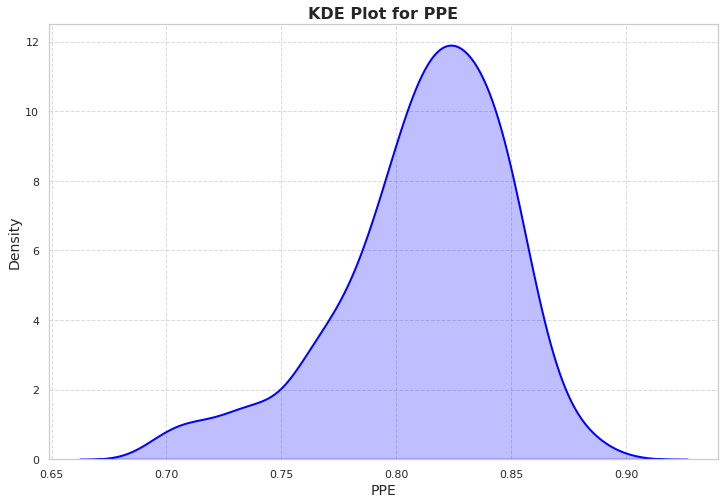

/tmp/ipykernel_326384/2793301264.py:82: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(Data[feature], shade=True)
/tmp/ipykernel_326384/2793301264.py:87: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(Data[feature], shade=True)
/tmp/ipykernel_326384/2793301264.py:92: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(Data[feature], shade=True)


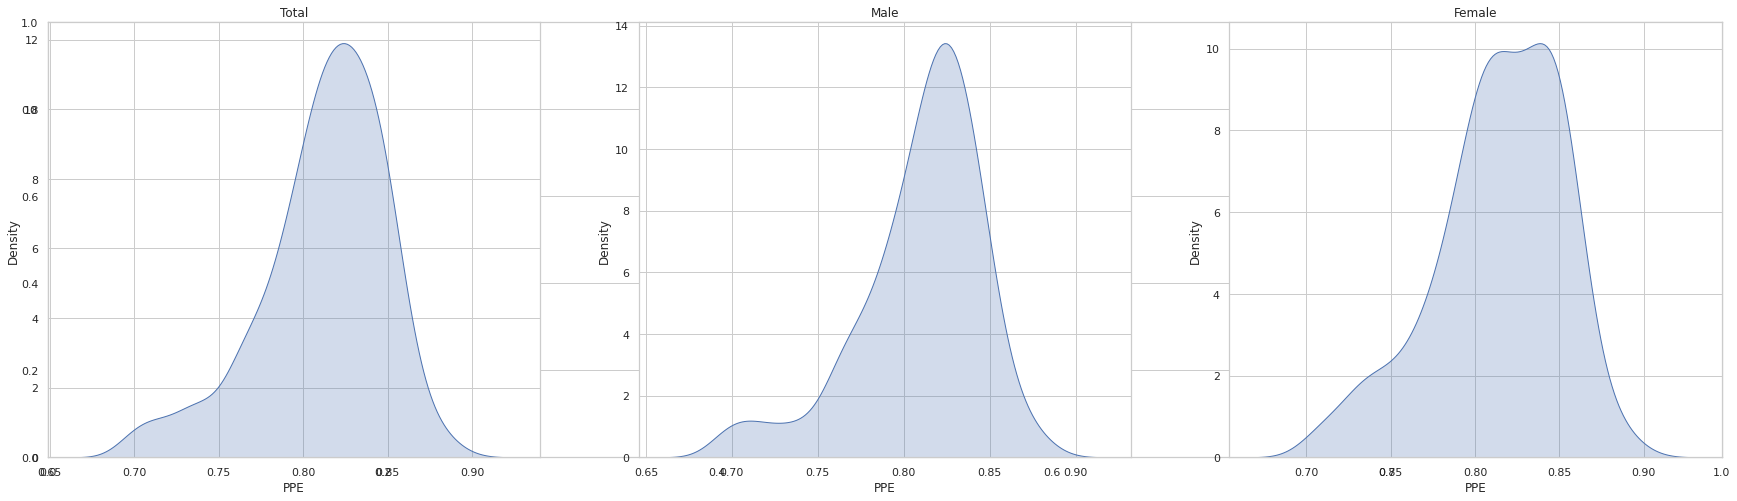

In [53]:
KPlot('PPE', rawdata_)
RelKPlot('PPE','Male', 'Female', 'gender', rawdata_, 1, 0)

/tmp/ipykernel_326384/2793301264.py:82: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(Data[feature], shade=True)
/tmp/ipykernel_326384/2793301264.py:87: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(Data[feature], shade=True)
/tmp/ipykernel_326384/2793301264.py:92: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(Data[feature], shade=True)


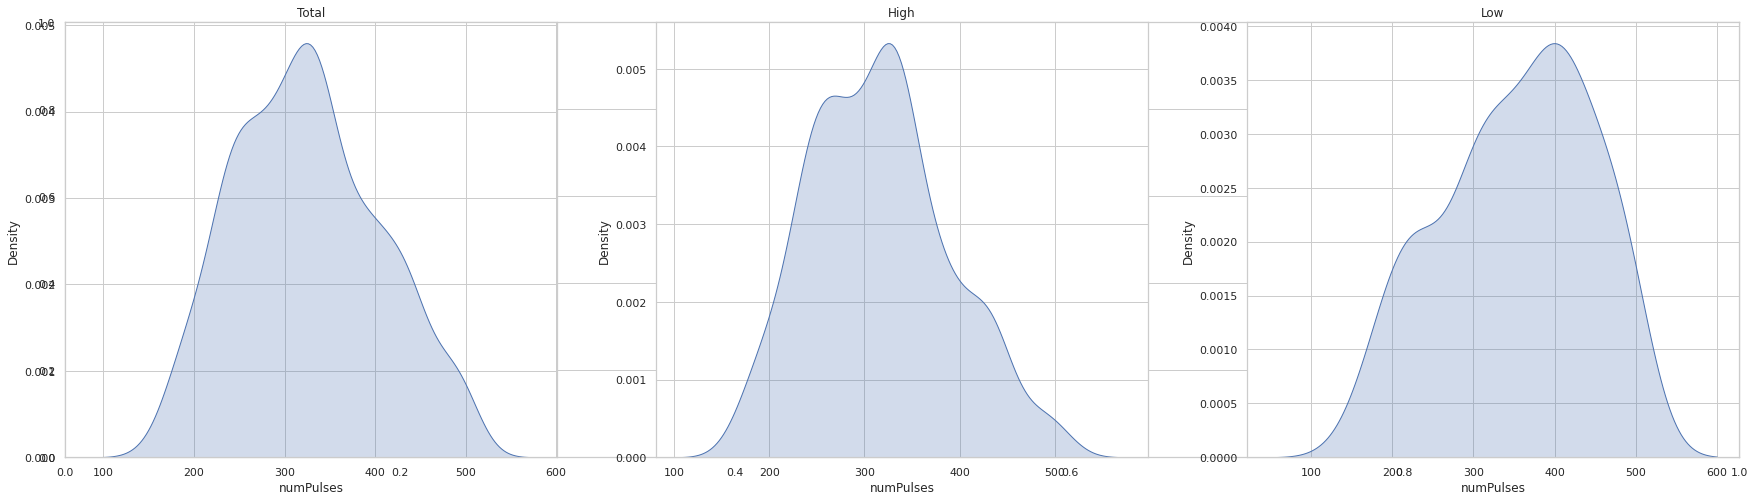

In [54]:

RelKPlot('numPulses','High', 'Low', 'class', rawdata_, 1, 0)

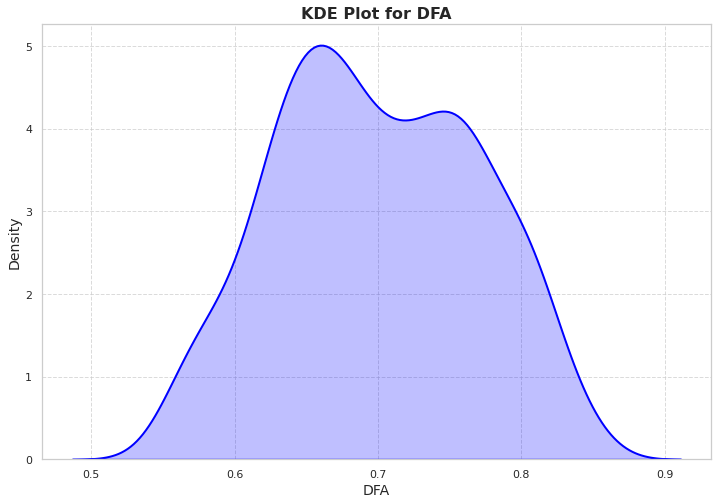

In [55]:
KPlot('DFA', PreparedDataFrame_)

In [56]:
# function definition of boxplot

def BPlot(data,feature1,feature2 = None,hue = None) : 
    fig, ax = plt.subplots(figsize=(10,6))
    if feature2 ==  None and hue == None : 
        sns.boxplot(data[feature1],width=0.3,color='r')
    elif  feature2 !=  None and hue == None :
        sns.boxplot(x = data[feature1],y=data[feature2],width=0.3,color='r')
    elif  feature2 !=  None and hue != None :
        sns.boxplot(x = data[feature1],y=data[feature2],hue=data[hue],width=0.3,color='r')



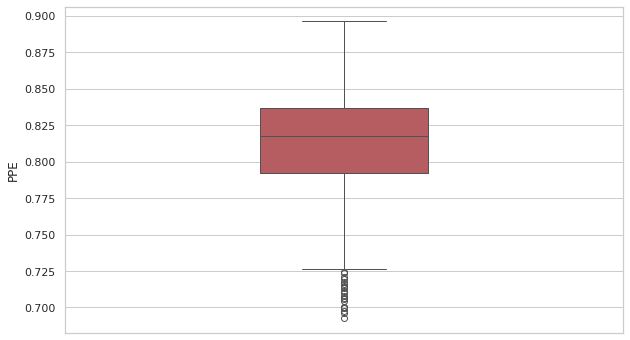

In [57]:
BPlot(rawdata_, 'PPE')

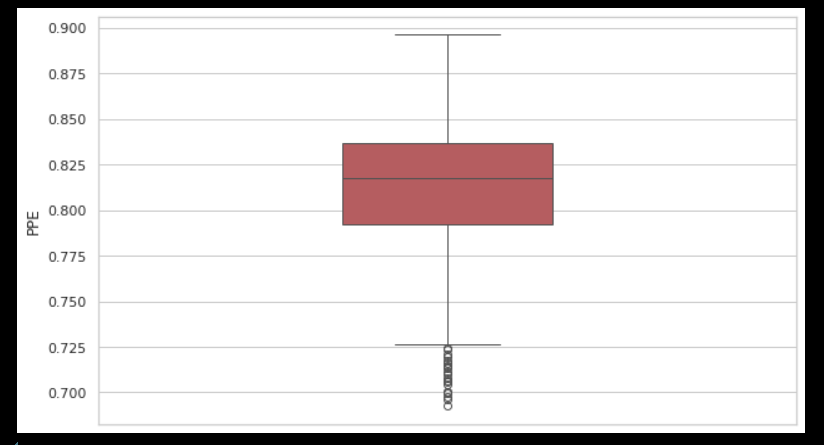
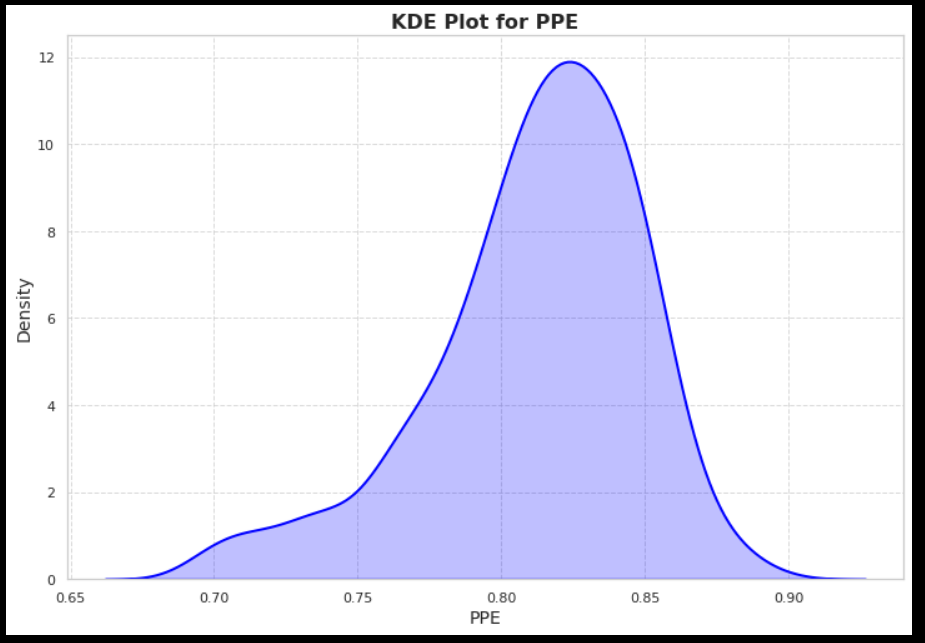

    - from the 2 graphs we can get from kde plot outliers that make distro is skewed left 

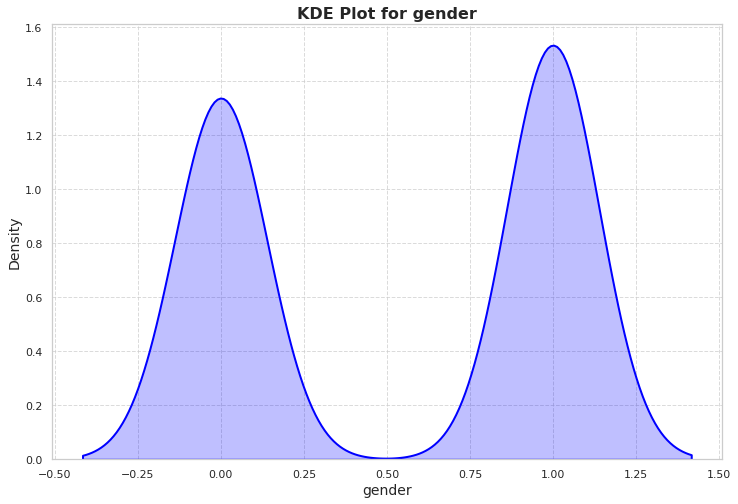

In [58]:
KPlot('gender', rawdata_)

# the output here is wrong cause it is categorical so kde for numerical only

In [59]:
# function definition of categorical 

def CPlot(data, feature) : 
    fig, ax = plt.subplots(figsize=(10,6))
    sns.countplot(x=feature, data=data,facecolor=(0, 0, 0, 0),linewidth=5,edgecolor=sns.color_palette("dark", 3))







def RelCPlot(feature, firstclass, secondclass, selectedfeature, data, firstvalue, secondvalue, Limit=10) : 
    fig, ax = plt.subplots(figsize=(30,8))

    plt.subplot(1,3,1)
    plt.title('Total')
    Data = data
    sns.countplot(x=feature, data=Data,facecolor=(0, 0, 0, 0),linewidth=5,
                  edgecolor=sns.color_palette("dark", 3))

    plt.subplot(1,3,2)
    plt.title(firstclass)
    Data = data[data[selectedfeature]==firstvalue]
    sns.countplot(x=feature, data=Data,facecolor=(0, 0, 0, 0),linewidth=5,
                  edgecolor=sns.color_palette("dark", 3))

    plt.subplot(1,3,3)
    plt.title(secondclass)
    Data = data[data[selectedfeature]==secondvalue]
    sns.countplot(x=feature, data=Data,facecolor=(0, 0, 0, 0),linewidth=5,
                  edgecolor=sns.color_palette("dark", 3))
    plt.show()        



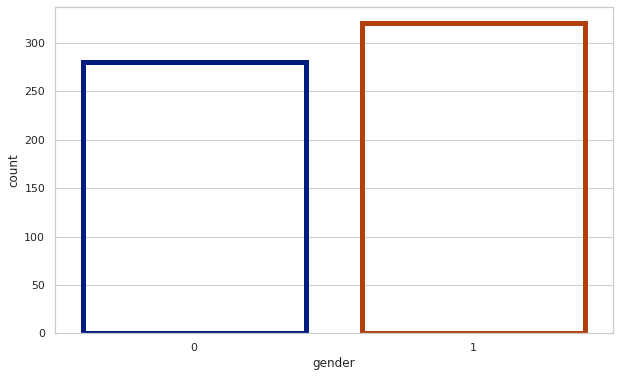

In [60]:
CPlot(rawdata_,'gender')

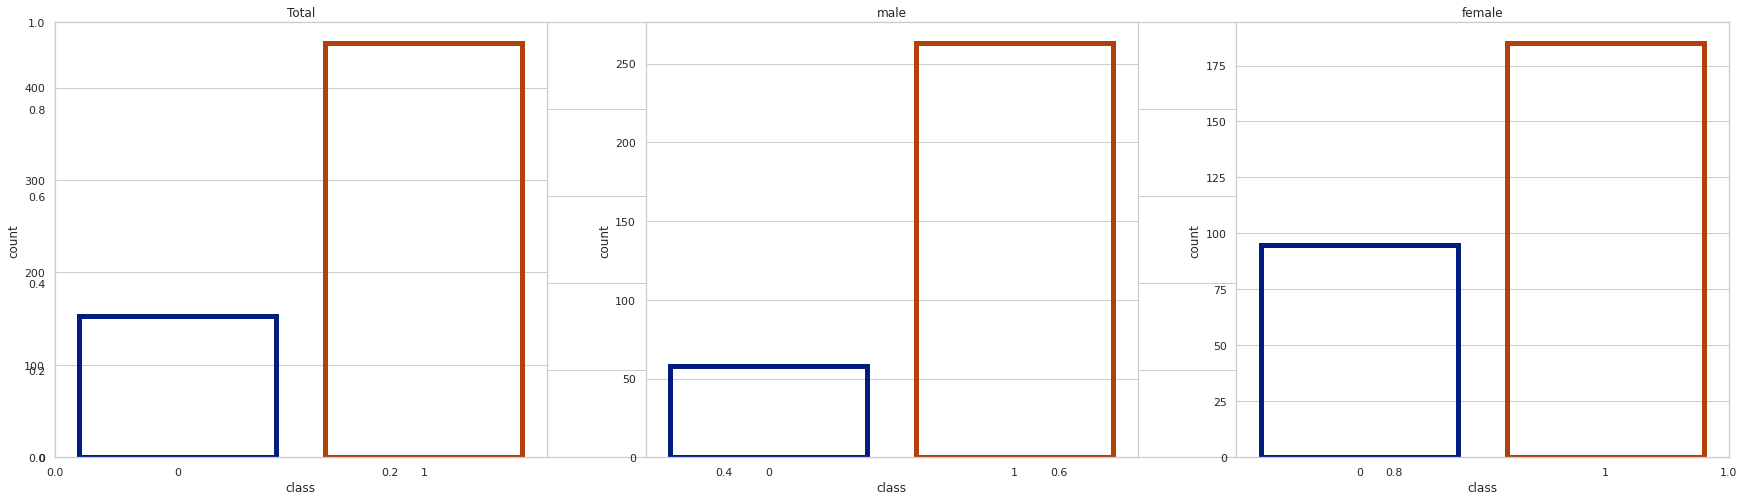

In [61]:
RelCPlot('class', 'male', 'female', 'gender', rawdata_, 1, 0)

In [62]:
# function definition interactive pie of cetogrical






# Example function to create a pie chart
def create_pie_chart(df, value_col, name_col, title):
    """
    Creates and shows a pie chart for the given DataFrame.

    Parameters:
    - df (DataFrame): The pandas DataFrame containing the data.
    - value_col (str): The name of the column containing the values for the pie chart.
    - name_col (str): The name of the column containing the names for the pie chart.
    - title (str): The title of the pie chart.
    """
    # Ensure the DataFrame is not empty
    if df.empty:
        print("The DataFrame is empty.")
        return

    # Optionally, aggregate or preprocess the data if needed
    # For example, consolidating small categories into 'Other'
    threshold = 1000  # Example threshold, adjust as needed
    df.loc[df[value_col] < threshold, name_col] = 'Other categories'

    # Create a pie chart
    fig = px.pie(df, values=value_col, names=name_col, title=title)
    
    # Show the figure
    fig.show()




In [63]:

create_pie_chart(rawdata_, value_col='class', name_col='gender', title='Distribution of Gender')

/tmp/ipykernel_326384/731132896.py:27: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'Other categories' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.loc[df[value_col] < threshold, name_col] = 'Other categories'


In [64]:
PreparedDataFrame_


gender      DFA     RPDE  numPulses  numPeriodsPulses  locPctJitter  \
0       1.0  0.71826  0.57227      240.0             239.0       0.00218   
1       1.0  0.69481  0.53966      234.0             233.0       0.00195   
2       1.0  0.67604  0.58982      232.0             231.0       0.00176   
3       1.0  0.62145  0.54543      322.0             321.0       0.00222   
4       1.0  0.62079  0.51179      318.0             317.0       0.00282   
..      ...      ...      ...        ...               ...           ...   
596     0.0  0.57849  0.36017      375.0             374.0       0.00088   
597     0.0  0.56355  0.28385      417.0             416.0       0.00064   
598     0.0  0.72335  0.46815      381.0             380.0       0.00076   
599     0.0  0.74890  0.49823      340.0             339.0       0.00092   
600     0.0  0.76471  0.46374      340.0             339.0       0.00078   

     locAbsJitter  rapJitter  ppq5Jitter  apq11Shimmer  \
0        0.000018    0.00067     0.00129       0.04828   
1        0.000016    0.00052     0.00112       0.06195   
2        0.000015    0.00057     0.00111       0.07772   
3        0.000013    0.00036     0.00094       0.03274   
4        0.000017    0.00034     0.00088       0.06445   
..            ...        ...         ...           ...   
596      0.000005    0.00012     0.00033       0.01463   
597      0.000003    0.00008     0.00022       0.01547   
598      0.000004    0.00011     0.00030       0.02271   
599      0.000005    0.00017     0.00041       0.02648   
600      0.000004    0.00014     0.00033       0.02765   

     meanHarmToNoiseHarmonicity  minIntensity  maxIntensity  meanIntensity  \
0                        18.995     69.997496     76.088046      72.465512   
1                        21.497     67.415903     73.046374      71.528945   
2                        17.651     62.661706     71.633549      68.086583   
3                        18.670     75.059718     78.381263      77.077102   
4                        20.302     75.097654     78.465346      76.841929   
..                          ...           ...           ...            ...   
596                      23.697     75.547500     77.575113      76.582605   
597                      26.813     79.991789     82.239447      81.244436   
598                      24.005     75.091300     77.612498      76.485859   
599                      19.706     76.168804     79.266058      77.870915   
600                      25.276     76.076331     79.670177      77.995949   

             f1           f2  VFER_mean  VFER_entropy  VFER_NSR_SEO  \
0    539.342735  1031.849040   0.000463       0.83621        1.3305   
1    564.363615  1016.367294   0.000615       1.04550        1.3177   
2    548.444604  1032.406341   0.000360       0.63668        1.3078   
3    710.861860  1165.801015   0.001706       3.47510        1.3039   
4    668.306515  1165.769341   0.001773       3.54940        1.3607   
..          ...          ...        ...           ...           ...   
596  931.741012  1466.757628   0.002772       6.10490        1.3734   
597  881.915768  1395.398812   0.019310      30.50930        1.4734   
598  687.046383  1382.653498   0.000113       0.38927        1.1821   
599  771.948334  1657.021811   0.000138       0.40543        1.1383   
600  706.566999  1612.140356   0.000059       0.19117        1.1496   

     IMF_SNR_entropy  mean_MFCC_0th_coef  mean_MFCC_2nd_coef  \
0            23.2610             11.4283             2.48740   
1            21.8851             12.1387             2.89860   
2            41.7310             11.3956             3.22080   
3            11.1578             16.8423             0.74769   
4             2.7385             16.1057            -0.66462   
..               ...                 ...                 ...   
596           5.6818             16.0844            -1.78610   
597           1.9044             19.2331            -1.97830   
598           9.2936         

### 7. building the model
___

In [ ]:
rawdata_

#####   7.1 - we will work with 100 features

In [ ]:
PreparedDataFrame_

In [110]:
X= PreparedDataFrame_.drop(['class'], axis=1)
y= PreparedDataFrame_['class']

In [ ]:
#Splitting data

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=44, shuffle =True)

#Splitted Data
print('X_train shape is ' , X_train.shape)
print('X_test shape is ' , X_test.shape)
print('y_train shape is ' , y_train.shape)
print('y_test shape is ' , y_test.shape)

In [ ]:

#Applying RandomForestClassifier Model 

'''
ensemble.RandomForestClassifier(n_estimators='warn’, criterion=’gini’, max_depth=None,
                                min_samples_split=2, min_samples_leaf=1,min_weight_fraction_leaf=0.0,
                                max_features='auto’,max_leaf_nodes=None,min_impurity_decrease=0.0,
                                min_impurity_split=None, bootstrap=True,oob_score=False, n_jobs=None,
                                random_state=None, verbose=0,warm_start=False, class_weight=None)
'''

RandomForestClassifierModel = RandomForestClassifier(criterion = 'gini',n_estimators=100,max_depth=2,random_state=33) #criterion can be also : entropy 
RandomForestClassifierModel.fit(X_train, y_train)



#Calculating Prediction
y_pred = RandomForestClassifierModel.predict(X_test)
y_pred


In [ ]:
y_test.values

In [ ]:
resultCorrect_Incorrect = []
for pred,actual in zip(y_pred, y_test.values):
    if pred == actual:
        resultCorrect_Incorrect.append('correct')
    else :
        resultCorrect_Incorrect.append('incorrect')

pd.Series(resultCorrect_Incorrect).value_counts()

In [ ]:


#----------------------------------------------------
#Calculating Confusion Matrix
CM = confusion_matrix(y_test, y_pred)
print('Confusion Matrix is : \n', CM)


# drawing confusion matrix
sns.heatmap(CM, center = True,cmap='Blues_r')
plt.show()

In [ ]:

#----------------------------------------------------
#Calculating classification Report :  
#classification_report(y_true, y_pred, labels=None, target_names=None,sample_weight=None, digits=2, output_dict=False)

ClassificationReport = classification_report(y_test,y_pred)
print('Classification Report is : ', ClassificationReport )

    - We need compare among differenet models

In [117]:

GaussianNBModel = GaussianNB()
BernoulliNBModel = BernoulliNB(alpha=1.0,binarize=1)
LogisticRegressionModel = LogisticRegression(penalty='l2',solver='sag',C=1.0,random_state=33)
SGDClassifierModel = SGDClassifier(penalty='l2', loss='squared_error', learning_rate='optimal', random_state=33)
RandomForestClassifierModel = RandomForestClassifier(criterion = 'gini',n_estimators=300,max_depth=7,random_state=33) 
GBCModel = GradientBoostingClassifier(n_estimators=100,max_depth=3,random_state=33) 
QDAModel = QuadraticDiscriminantAnalysis(tol=0.0001)
SVCModel = SVC(kernel= 'rbf',max_iter=100,C=1.0,gamma='auto')
DecisionTreeClassifierModel = DecisionTreeClassifier(criterion='gini',max_depth=3,random_state=33)
KNNClassifierModel = KNeighborsClassifier(n_neighbors= 5,weights ='uniform',algorithm='auto') 

Models = [GaussianNBModel,KNNClassifierModel,
          BernoulliNBModel,LogisticRegressionModel,RandomForestClassifierModel,
          GBCModel,SGDClassifierModel,QDAModel,SVCModel,DecisionTreeClassifierModel]



In [ ]:


ModelsScore = {}
for Model in Models : 
    print(f'for Model {str(Model).split("(")[0]}')
    Model.fit(X_train, y_train)
    print(f'Train Score is : {Model.score(X_train, y_train)}')
    print(f'Test Score is : {Model.score(X_test, y_test)}')
    y_pred = Model.predict(X_test)
    ClassificationReport = classification_report(y_test,y_pred)
    print('Classification Report is : \n', ClassificationReport )
    print(f'Precision value is  : {ClassificationReport.split()[19]}')
    print(f'Recall value is  : {ClassificationReport.split()[20]}')
    print(f'F1 Score value is  : {ClassificationReport.split()[21]}')
    ModelsScore[str(Model).split("(")[0]] = [ClassificationReport.split()[19],
                                             ClassificationReport.split()[20],ClassificationReport.split()[21]]
    print('=================================================')

#####   7.2 - we will work with 125 features

In [141]:
FeatureSelection = SelectPercentile(score_func = f_classif, percentile=(0.5 * 100)) # score_func can = f_classif
X_selected = FeatureSelection.fit_transform(X, y)


PreparedDataFrameSecond_ = pd.DataFrame(X_selected, columns= [i for i,j in zip(X.columns,  FeatureSelection.get_support()) if j ]) 


In [ ]:
PreparedDataFrameSecond_

In [ ]:

#Splitting data

X_train, X_test, y_train, y_test = train_test_split(PreparedDataFrameSecond_, y, test_size=0.25, random_state=44, shuffle =True)

#Splitted Data
print('X_train shape is ' , X_train.shape)
print('X_test shape is ' , X_test.shape)
print('y_train shape is ' , y_train.shape)
print('y_test shape is ' , y_test.shape)



ModelsScore125Feature = {}
for Model in Models : 
    print(f'for Model {str(Model).split("(")[0]}')
    Model.fit(X_train, y_train)
    print(f'Train Score is : {Model.score(X_train, y_train)}')
    print(f'Test Score is : {Model.score(X_test, y_test)}')
    y_pred = Model.predict(X_test)
    ClassificationReport = classification_report(y_test,y_pred)
    print('Classification Report is : \n', ClassificationReport )
    print(f'Precision value is  : {ClassificationReport.split()[19]}')
    print(f'Recall value is  : {ClassificationReport.split()[20]}')
    print(f'F1 Score value is  : {ClassificationReport.split()[21]}')
    ModelsScore125Feature[str(Model).split("(")[0]] = [ClassificationReport.split()[19],
                                             ClassificationReport.split()[20],ClassificationReport.split()[21]]
    print('=================================================')


#####   7.3 - we will work with 50 features

In [155]:





FeatureSelectionthirdedition = SelectPercentile(score_func = f_classif, percentile=(((0.07+Percentagereduction) * 100))) # score_func can = f_classif
X_selectedthirdedition = FeatureSelectionthirdedition.fit_transform(X, y)


PreparedDataFrame_ = pd.DataFrame(X_selectedthirdedition, columns= [i for i,j in zip(X.columns,  FeatureSelectionthirdedition.get_support()) if j ]) 


In [ ]:
PreparedDataFrame_

In [ ]:

#Splitting data

X_train, X_test, y_train, y_test = train_test_split(PreparedDataFrameSecond_, y, test_size=0.25, random_state=44, shuffle =True)

#Splitted Data
print('X_train shape is ' , X_train.shape)
print('X_test shape is ' , X_test.shape)
print('y_train shape is ' , y_train.shape)
print('y_test shape is ' , y_test.shape)



ModelsScore50Feature = {}
for Model in Models : 
    print(f'for Model {str(Model).split("(")[0]}')
    Model.fit(X_train, y_train)
    print(f'Train Score is : {Model.score(X_train, y_train)}')
    print(f'Test Score is : {Model.score(X_test, y_test)}')
    y_pred = Model.predict(X_test)
    ClassificationReport = classification_report(y_test,y_pred)
    print('Classification Report is : \n', ClassificationReport )
    print(f'Precision value is  : {ClassificationReport.split()[19]}')
    print(f'Recall value is  : {ClassificationReport.split()[20]}')
    print(f'F1 Score value is  : {ClassificationReport.split()[21]}')
    ModelsScore50Feature[str(Model).split("(")[0]] = [ClassificationReport.split()[19],
                                             ClassificationReport.split()[20],ClassificationReport.split()[21]]
    print('=================================================')


In [ ]:
ModelsScore

In [ ]:
ModelsScore50Feature

In [ ]:
ModelsScore125Feature

### 8. evaluation the model
___

In [ ]:
rawdata_.head()

In [165]:
X= rawdata_.drop(['class'], axis = 1)
y= rawdata_['class']

##### 7.4 using PCA

In [ ]:
# Convert categorical variables to numeric using one-hot encoding
X_encoded = pd.get_dummies(X)

# Apply PCA
PCAModel = PCA(n_components=X_encoded.shape[0],  svd_solver='auto')
PCAComp = PCAModel.fit_transform(X_encoded)

# Convert the result back to a DataFrame
PCAReduced = pd.DataFrame(PCAComp)

PCAReduced.shape



In [ ]:
PCAReduced

In [ ]:
# Assuming PCA has already been applied and PCAModel is defined
plt.figure(figsize=(20,10))
plt.title('Explained Variance Ratio by Principal Components')
plt.xlabel('Number of Components')
plt.ylabel('Variance Ratio')

# Plotting the explained variance ratio
plt.plot(range(1, len(PCAModel.explained_variance_ratio_) + 1), PCAModel.explained_variance_ratio_, linewidth=1, alpha=1, linestyle='solid', marker='o')
plt.show()

In [ ]:
# Assuming PCA has already been applied and PCAModel is defined
plt.figure(figsize=(20,10))
plt.title('Explained and Cumulative Variance Ratio by Principal Components')
plt.xlabel('Number of Components')
plt.ylabel('Variance Ratio')

# Number of components (for the x-axis)
components = range(1, len(PCAModel.explained_variance_ratio_) + 1)

# Cumulative explained variance
cumulative_explained_variance = [sum(PCAModel.explained_variance_ratio_[:i+1]) for i in components]

# Plotting the individual explained variance ratio
plt.plot(components, PCAModel.explained_variance_ratio_, linewidth=1, alpha=1, linestyle='solid', marker='o', label='Individual Explained Variance Ratio')

# Plotting the cumulative explained variance ratio
plt.plot(components, cumulative_explained_variance, linewidth=1, alpha=1, linestyle='solid', marker='x', label='Cumulative Explained Variance Ratio')

plt.legend()
plt.show()

###### 7.4.1 using PCA100

In [ ]:

# Apply PCA
PCAModel = PCA(n_components=100,  svd_solver='auto')
X_100 = PCAModel.fit_transform(X_encoded)
X_100 = pd.DataFrame(X_100)
X_100

In [ ]:

#Splitting data

X_train, X_test, y_train, y_test = train_test_split(X_100, y, test_size=0.25, random_state=44, shuffle =True)

#Splitted Data
print('X_train shape is ' , X_train.shape)
print('X_test shape is ' , X_test.shape)
print('y_train shape is ' , y_train.shape)
print('y_test shape is ' , y_test.shape)



ModelsScoreX_100PCA= {}
for Model in Models : 
    print(f'for Model {str(Model).split("(")[0]}')
    Model.fit(X_train, y_train)
    print(f'Train Score is : {Model.score(X_train, y_train)}')
    print(f'Test Score is : {Model.score(X_test, y_test)}')
    y_pred = Model.predict(X_test)
    ClassificationReport = classification_report(y_test,y_pred)
    print('Classification Report is : \n', ClassificationReport )
    print(f'Precision value is  : {ClassificationReport.split()[19]}')
    print(f'Recall value is  : {ClassificationReport.split()[20]}')
    print(f'F1 Score value is  : {ClassificationReport.split()[21]}')
    ModelsScoreX_100PCA[str(Model).split("(")[0]] = [ClassificationReport.split()[19],
                                             ClassificationReport.split()[20],ClassificationReport.split()[21]]
    print('=================================================')


###### 7.4.2 using PCA200

In [ ]:

# Apply PCA
PCAModel = PCA(n_components=100,  svd_solver='auto')
X_200 = PCAModel.fit_transform(X_encoded)
X_200 = pd.DataFrame(X_200)
X_200






#Splitting data

X_train, X_test, y_train, y_test = train_test_split(X_200, y, test_size=0.25, random_state=44, shuffle =True)

#Splitted Data
print('X_train shape is ' , X_train.shape)
print('X_test shape is ' , X_test.shape)
print('y_train shape is ' , y_train.shape)
print('y_test shape is ' , y_test.shape)



ModelsScoreX_200PCA= {}
for Model in Models : 
    print(f'for Model {str(Model).split("(")[0]}')
    Model.fit(X_train, y_train)
    print(f'Train Score is : {Model.score(X_train, y_train)}')
    print(f'Test Score is : {Model.score(X_test, y_test)}')
    y_pred = Model.predict(X_test)
    ClassificationReport = classification_report(y_test,y_pred)
    print('Classification Report is : \n', ClassificationReport )
    print(f'Precision value is  : {ClassificationReport.split()[19]}')
    print(f'Recall value is  : {ClassificationReport.split()[20]}')
    print(f'F1 Score value is  : {ClassificationReport.split()[21]}')
    ModelsScoreX_200PCA[str(Model).split("(")[0]] = [ClassificationReport.split()[19],
                                             ClassificationReport.split()[20],ClassificationReport.split()[21]]
    print('=================================================')







In [ ]:
ModelsScoreX_200PCA

In [ ]:
ModelsScoreX_100PCA

In [ ]:
ModelsScore

In [ ]:
ModelsScore125Feature

In [ ]:
ModelsScore50Feature